# **RQ3: How does the interaction change the covered solution space?**

# **COCOME Case Study**


This is both about the search space and the objective space. 
Is the solution space only about quality attributes? or is it a wider notion?

Indicators (for objective space):
*   Quality-attribute objectives such as: perfQ and reliability, or others. If a 4D space is considered, the visualization might require a PCA (or similar) kind of projection.
*   Types of clusters (or discretization ranges) identified across the objective space.
*   Coverage of the quality-attribute space (e.g., density), beyond the Pareto frontier.

Indicators (for search space):
*   Paths covered by each search tree, based on the reference space (tree).






In [1]:
#!pip install altair --quiet
#!pip install pca --quiet
#!pip install zss --quiet
#!pip install pymoo --quiet 
##!pip install dataframe_image --quiet
#!pip install distinctipy --quiet
##!pip install fastDamerauLevenshtein --quiet
#!pip install opentsne --quiet
#!pip install yellowbrick --quiet
#!pip install plotly --quiet
#!pip install networkx --quiet
#!pip install pydot --quiet
#!pip install matplotlib_venn --quiet

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn2
#import dataframe_image as dfi
from PIL import Image
import networkx as nx
import seaborn as sns
#import imgkit

In [7]:
# This is the class that imports all the functions needed for the analysis
from architecturespaceanalyzer import ArchitectureSpaceAnalyzer 

---

## **File downloads and Parsing**

In [8]:
# This is the reference Pareto front/space
NSGAII_PROJECT_NAME = 'nsgaii-cocome-1000-eval'
NSGAII_DATAPATH = './zips/'+ NSGAII_PROJECT_NAME +'.zip' 

### *Non-interactive run*

In [9]:
# This is the non-interactive run (100 eval, length 4)
# cocome-baseline-100-eval 
NSGAII_IT0_100_PROJECT_NAME = 'nsgaii-cocome-sbspe-100-eval-it-0'
NSGAII_IT0_100_DATAPATH = './zips/'+ NSGAII_IT0_100_PROJECT_NAME +'.zip' 

### _Interactive runs_

In [10]:
# cocome 1st step of 50 eval, length 2
NSGAII_IT0_50_PROJECT_NAME = 'nsgaii-cocome-sbspe-50-eval-it-0-l-2'
NSGAII_IT0_50_DATAPATH = './zips/'+ NSGAII_IT0_50_PROJECT_NAME +'.zip' 

In [11]:
# cocome 2nd step of 50 eval, length 2 (using centroid 317)
NSGAII_IT1_50_C317_PROJECT_NAME = 'nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-317'
NSGAII_IT1_50_C317_DATAPATH = './zips/'+ NSGAII_IT1_50_C317_PROJECT_NAME +'.zip' 

In [12]:
# cocome 2nd step of 50 eval, length 2 (using centroid 358)
NSGAII_IT1_50_C358_PROJECT_NAME = 'nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-358'
NSGAII_IT1_50_C358_DATAPATH = './zips/'+ NSGAII_IT1_50_C358_PROJECT_NAME +'.zip' 

In [13]:
%%capture
!unzip -o $NSGAII_DATAPATH -d datasets
!unzip -o $NSGAII_IT0_100_DATAPATH -d datasets
!unzip -o $NSGAII_IT0_50_DATAPATH -d datasets
!unzip -o $NSGAII_IT1_50_C317_DATAPATH -d datasets
!unzip -o $NSGAII_IT1_50_C358_DATAPATH -d datasets

In [14]:
#!rm -r 'datasets'

In [15]:
#import matplotlib
#matplotlib.rcParams.update({'font.size': 70})

# **ANALYSIS OF QUALITY ATTRIBUTES**

In [16]:
ALL_CLUSTER_LABELS = ['very-slow / very-reliable / very-few / very-few',
 'average / average / some / few',
 'slow / very-reliable / few / average',
 'average / reliable / average / few',
 'average / very-reliable / many / some',
 'average / unreliable / few / very-few',
 'average / reliable / some / average',
 'average / very-reliable / average / very-few',
 'average / minimally-reliable / many / average',
 'average / minimally-reliable / few / very-few',
 'average / reliable / few / average',
 'average / very-reliable / average / average',
 'average / unreliable / very-few / very-few',
 'average / very-reliable / few / average',
 'average / average / few / few',
 'average / minimally-reliable / some / average',
 'very-slow / reliable / very-few / very-few',
 'average / reliable / many / average',
 'average / reliable / average / average',
 'average / reliable / very-few / few',
 'average / minimally-reliable / few / few',
 'very-slow / very-reliable / few / very-few',
 'average / very-reliable / average / some',
 'average / reliable / very-few / very-few',
 'slow / very-reliable / few / very-few',
 'slow / very-reliable / average / few',
 'slow / very-reliable / some / some',
 'slow / very-reliable / average / average',
 'average / very-reliable / few / very-few',
 'slow / very-reliable / very-few / few',
 'slow / very-reliable / average / very-few',
 'slow / average / very-few / few',
 'slow / very-reliable / few / few',
 'slow / very-reliable / few / some',
 'slow / very-reliable / very-few / very-few',
 'slow / minimally-reliable / very-few / very-few',
 'average / average / very-few / very-few',
 'very-slow / average / very-few / very-few',
 'average / very-reliable / some / average',
 'slow / very-reliable / average / many',
 'average / minimally-reliable / very-few / very-few',
 'average / minimally-reliable / average / few',
 'average / very-reliable / average / few',
 'average / reliable / few / few',
 'average / average / few / very-few',
 'average / very-reliable / some / some',
 'average / very-reliable / average / many',
 'average / reliable / some / few',
 'average / very-reliable / few / few',
 'slow / reliable / few / very-few',
 'average / average / average / few',
 'average / very-reliable / very-few / few',
 'average / very-reliable / many / many',
 'average / very-reliable / many / average',
 'average / reliable / some / some',
 'average / reliable / few / very-few',
 'average / very-reliable / very-few / very-few',
 'average / average / very-few / few',
 'slow / very-reliable / some / many',
 'slow / average / very-few / very-few',
 'slow / reliable / very-few / very-few']

#PROBLEM_OBJECTIVES = OBJS_PERFQ_RELIABILITY + ['#changes', 'pas']

# Global (common) ranges for the objectives
PERFORMANCE_LIMITS = (-0.2,1)
RELIABILITY_LIMITS = (-1,1)
CHANGES_LIMITS = (1,84)
PAS_LIMITS = (0,86)

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.manifold import TSNE
from openTSNE import TSNE

LE_ALL_CLUSTER_LABELS = LabelEncoder().fit(ALL_CLUSTER_LABELS)

def show_tradeoffs_pca(space, pca=None, title=None):
  clabels = LE_ALL_CLUSTER_LABELS.transform(space.tagged_objectives_df['label'])
  #mypalette = space.set_colors(n=len(set(clabels)), show_palette=True)
  #space.set_colors(n=len(set(clabels)))
  #mypalette=space.CLUSTERS_COLORS
  #print(len(space.CLUSTERS_COLORS))
  #le = preprocessing.LabelEncoder().fit(clabels)
  #mypalette = [space.LABELS_COLORS[lb] for lb in ALL_CLUSTER_LABELS if (lb in set(clabels))]
  pca_ = space.show_clusters_pca_2d(cluster_labels=clabels, palette=list(space.LABELS_COLORS.values()), pca=pca, title=title)
  return pca_

# Apply t-SNE on the dataframe
def apply_tsne(df, n_tsne=2, normalize=True):
    if normalize:
      sample = StandardScaler().fit_transform(df)
    else:
      sample = df  
    tsne_embedding = TSNE(n_components=n_tsne, random_state=1).fit(sample)
    #sample_tsne = tsne_.fit_transform(sample)

    return tsne_embedding

# Show the clusters after a 2D t-SNE reduction 
def show_clusters_tsne(space, cluster_labels=None, palette=None, title=None, size=(600,400), tsne=None):
  df = space.objectives_df[space.ALL_OBJECTIVES]
  tsne_ = tsne
  if tsne_ is None:
    tsne_sample = apply_tsne(df)
    tsne_ = tsne_sample
  else:
    print("Reusing t-SNE")
    tsne_sample = tsne_.transform(StandardScaler().fit_transform(df.values))
  print(len(df.columns), "features", list(df.columns))
  if title is None:
    title = space.PROJECT_NAME

  # Show the 2D representation
  plt.figure(figsize=(size[0]/60,size[1]/60))
  if cluster_labels is not None:
    print(len(set(cluster_labels)), "clusters")
  else:
    print("no clusters")
  if palette is None:
    plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1], c='blue', s=50, alpha=0.7, cmap='viridis')
  else:
    cluster_colors = [palette[c] for c in cluster_labels]
    plt.scatter(tsne_sample[:, 0], tsne_sample[:, 1], c=cluster_colors, s=50, alpha=0.7, cmap='viridis')
 
  # title and labels
  plt.title(title, fontsize=16)

  plt.show()
  #return palette
  return tsne_

def show_tradeoffs_tsne(space, tsne=None, title=None):
  clabels = LE_ALL_CLUSTER_LABELS.transform(space.tagged_objectives_df['label'])
  tsne_ = show_clusters_tsne(space, cluster_labels=clabels, palette=list(space.LABELS_COLORS.values()), tsne=tsne, title=title)
  return tsne_


---
## **Reference Pareto Front (1000)**

In [18]:
# Initialize the project/file
ref1000_space = ArchitectureSpaceAnalyzer()
ref1000_space.initialize_dataset(NSGAII_PROJECT_NAME)
print(ref1000_space.PROJECT_NAME)

ref1000_space.set_labels(ALL_CLUSTER_LABELS)
ref1000_space.PERFORMANCE_LIMITS = PERFORMANCE_LIMITS
ref1000_space.RELIABILITY_LIMITS = RELIABILITY_LIMITS
ref1000_space.CHANGES_LIMITS = CHANGES_LIMITS
ref1000_space.PAS_LIMITS = PAS_LIMITS

# Read all the objectives and refactoring actions
# Note that length of sequences is 4
_ = ref1000_space.read_file_batch(1,31, length=4, arguments=0, option='all')

project: nsgaii-cocome-1000-eval
objective files= 31
refactoring actions files= 31
nsgaii-cocome-1000-eval
Reading files ... 1 31 all
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.


In [19]:
# This the global palette for all cluster labels
print(len(ref1000_space.CLUSTERS_COLORS))
sns.color_palette(ref1000_space.CLUSTERS_COLORS)

61


[(0.0, 1.0, 0.0),
 (1.0, 0.0, 1.0),
 (0.0, 0.5019607843137255, 1.0),
 (1.0, 0.5019607843137255, 0.0),
 (0.5019607843137255, 0.7490196078431373, 0.5019607843137255),
 (0.34509803921568627, 0.0, 0.6470588235294118),
 (0.7411764705882353, 0.00784313725490196, 0.047058823529411764),
 (0.2, 0.4980392156862745, 0.00784313725490196),
 (0.7411764705882353, 0.4745098039215686, 0.9921568627450981),
 (0.984313725490196, 0.9921568627450981, 0.25882352941176473),
 (0.0, 1.0, 1.0),
 (0.0, 1.0, 0.5019607843137255),
 (0.0, 0.5019607843137255, 0.5019607843137255),
 (0.7529411764705882, 0.25882352941176473, 0.5098039215686274),
 (0.0, 0.0, 1.0),
 (0.5372549019607843, 0.8627450980392157, 0.00784313725490196),
 (0.5294117647058824, 0.9607843137254902, 0.9764705882352941),
 (0.9333333333333333, 0.7058823529411765, 0.6274509803921569),
 (0.396078431372549, 0.4235294117647059, 0.7215686274509804),
 (0.2901960784313726, 0.19607843137254902, 0.21176470588235294),
 (0.5450980392156862, 0.13333333333333333, 0.996078431372549),
 (0.6392156862745098, 0.3607843137254902, 0.03137254901960784),
 (1.0, 0.0, 0.5019607843137255),
 (0.21568627450980393, 0.7215686274509804, 0.7725490196078432),
 (0.03529411764705882, 0.7215686274509804, 0.2235294117647059),
 (0.047058823529411764, 0.23529411764705882, 0.7294117647058823),
 (0.7333333333333333, 0.6431372549019608, 0.19215686274509805),
 (0.7137254901960784, 0.9803921568627451, 0.592156862745098),
 (0.3843137254901961, 0.9921568627450981, 0.3058823529411765),
 (0.984313725490196, 0.24313725490196078, 0.20784313725490197),
 (0.43529411764705883, 0.45098039215686275, 0.3215686274509804),
 (0.03529411764705882, 0.011764705882352941, 0.43529411764705883),
 (0.9725490196078431, 0.30980392156862746, 0.8274509803921568),
 (0.6392156862745098, 0.7333333333333333, 0.8431372549019608),
 (0.7176470588235294, 0.023529411764705882, 0.7215686274509804),
 (0.592156862745098, 0.00392156862745098, 0.3803921568627451),
 (0.35294117647058826, 0.9921568627450981, 0.6705882352941176),
 (0.25098039215686274, 0.2823529411764706, 0.996078431372549),
 (0.984313725490196, 0.6549019607843137, 1.0),
 (0.4196078431372549, 0.03137254901960784, 0.011764705882352941),
 (0.9490196078431372, 0.7725490196078432, 0.00784313725490196),
 (0.9921568627450981, 0.43137254901960786, 0.47058823529411764),
 (0.7058823529411765, 0.5058823529411764, 0.6470588235294118),
 (0.37254901960784315, 0.7019607843137254, 0.1803921568627451),
 (0.24313725490196078, 0.29411764705882354, 0.48627450980392156),
 (0.403921568627451, 0.6313725490196078, 1.0),
 (0.00392156862745098, 0.2980392156862745, 0.08627450980392157),
 (0.043137254901960784, 0.7647058823529411, 0.5490196078431373),
 (0.7529411764705882, 0.8627450980392157, 0.3254901960784314),
 (0.807843137254902, 0.9686274509803922, 0.01568627450980392),
 (0.996078431372549, 1.0, 0.6549019607843137),
 (0.996078431372549, 0.6392156862745098, 0.30980392156862746),
 (1.0, 0.0, 0.0),
 (0.49411764705882355, 0.18823529411764706, 0.5607843137254902),
 (0.2627450980392157, 0.6235294117647059, 0.43137254901960786),
 (0.13725490196078433, 0.4588235294117647, 0.26666666666666666),
 (0.09411764705882353, 0.9725490196078431, 0.2549019607843137),
 (0.21176470588235294, 0.8549019607843137, 0.058823529411764705),
 (0.6431372549019608, 0.2784313725490196, 0.788235294117647),
 (0.6470588235294118, 0.20784313725490197, 0.23921568627450981),
 (0.00392156862745098, 0.7450980392156863, 0.984313725490196)]

In [20]:
ref1000_space.objectives_df.head()

solID     perfQ  reliability  #changes   pas
0  17566  0.144165     0.762310      1.45  11.0
1  17811  0.251431     0.964951      6.18   7.0
2  22051  0.251435     0.964894     12.55  14.0
3  22521 -0.085576     0.865167      4.73   5.0
4  22660  0.231738     0.568227      4.54   2.0

Statistics for the 4 objectives.

In [21]:
ref1000_space.objectives_df.describe()

solID       perfQ  reliability    #changes         pas
count    492.000000  492.000000   492.000000  492.000000  492.000000
mean   22216.552846    0.232455     0.640214   20.089350   18.516260
std     7660.505997    0.149259     0.432185   18.861371   19.308033
min     1612.000000   -0.085715    -0.899479    1.450000    0.000000
25%    17692.000000    0.128335     0.488573    6.180000    6.000000
50%    25987.500000    0.248478     0.838768   12.520000   11.000000
75%    28495.250000    0.370558     0.963735   26.157500   23.000000
max    28882.000000    0.442030     0.990670   82.940000   86.000000

In [22]:
#ref1000_space.refactions_df.head()

### *Metrics*

In [23]:
ref1000_pf = ref1000_space.get_pareto_front()
ref1000_norm_pf = ref1000_space.compute_pareto_front()

# Look only at some of the metrics (NPS, HV, DE)
metrics1000_dict = ref1000_space.compute_all_metrics(ref_point=(1,1,1,1), reference_front=ref1000_norm_pf)
metrics1000_dict['point'] = 'reference'
print("Pareto front metrics for the 4 objectives:")
print(metrics1000_dict)
print('\tNPS', metrics1000_dict['NPS'], 'solutions')
print('\tHV', metrics1000_dict['HV'])
print('\tDE', metrics1000_dict['DE'])

ref1000_pf.head()

Pareto front metrics for the 4 objectives:
{'C_AB': 0.8125, 'C_BA': 0.005681818181818182, 'IGDPlus': 0.3204480027560768, 'HV': 0.923617060208186, 'NPS': 177, 'NSolutions': 398, 'NSequences': 492, 'DE': 0.5170576531962449, 'point': 'reference'}
	NPS 177 solutions
	HV 0.923617060208186
	DE 0.5170576531962449


perfQ  reliability  #changes  pas
0  0.071432     0.722674      5.08  0.0
1  0.129657     0.722551      4.35  2.0
2  0.141089     0.865046      4.54  2.0
3  0.153223     0.832568      4.54  2.0
4  0.155387     0.827818      4.54  2.0

### *Clustering*
This is not strictly needed for the RQ, but it is for computing the scatter plot below.

In [24]:
# Try k-Means
#labels, _, silhouette = ref1000_space.run_kmeans(k=5, show_silhouette=False) 

# Try agglomerative clustering
labels, _, silhouette = ref1000_space.run_agglomerative(k=3, threshold=None, show_dendogram=False) 
ref1000_space.assign_cluster_labels(labels) # This effectively assigns the labels

Number of clusters = 3
Labels for instances: [0 0 0 0 0 2 1 1 2 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 2 0 0 2 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 2 0 2 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 2 2 1 1 2 1 1 1 1 2 1 0 0 1 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0
 0 1 2 2 0 2 2 0 0 0 0 0 0 0 2 0 0 1 0 2 0 0 0 2 0 2 0 0 2 0 0 2 0 0 2 2 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 0 2 0 0 0 0 2
 2 0 0 2 0 0 0 2 2 2 0 2 2 2 0 0 0 2 1 1 1 1 0 0 1 1 0 1 1 0 0 0 2 0 0 0 2
 0 0 0 0 2 0 2 2 0 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 1 0 0 0 2 1 0
 0 1 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 1 2 0 1 0 1 1 1 1 0 0 1 0 1 0 2 0
 0 0 0 0 0 1 0 1 1 2 1 1 0 1 0 0 0 1 2 1 2 1 1 1 1 1 2 1 0 2 2 0 2 0 0 0 0
 0 2 2 2 2 2 0 2 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 2 2 0 0 0 2 2 2 0 2 2 0 1 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0
 0 0 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 2 0 0 0 0 0 2 

perfQ  reliability  #changes   pas  cluster  \
14   0.385698     0.603314     15.61  14.0        0   
357  0.189971     0.970340     61.37  69.0        1   
105  0.423133     0.033779     16.63  11.0        2   

                                        label  
14   average / reliable / very-few / very-few  
357        slow / very-reliable / some / many  
105   average / average / very-few / very-few

In [25]:
# Graphical representations of objectives in 2D space
ref1000_space.show_objective_space()
#ref1000_space.show_petal_plot(labels=True, size=(20,5))

Configuring (real) cluster centroids as prototypes ... [2, 115, 176]


alt.HConcatChart(...)

In [26]:
ref1000_space.clusters_info()

  cluster 0 : 335 items 68.09 % average / reliable / very-few / very-few
  cluster 2 : 111 items 22.56 % average / average / very-few / very-few
  cluster 1 : 46 items 9.35 % slow / very-reliable / some / many


In [27]:
ref1000_space.describe_cluster_labels()

Using predefined limits (-0.2, 1)
Using predefined limits (1, 84)
Using predefined limits (0, 86)
Using predefined limits (-1, 1)


objective    min    max  unit               label
0         perfQ  -0.30  -0.02  unit           very-slow
1         perfQ  -0.02   0.26  unit                slow
2         perfQ   0.26   0.54  unit             average
3         perfQ   0.54   0.82  unit                fast
4         perfQ   0.82   1.10  unit           very-fast
5      #changes   0.90  17.54  unit            very-few
6      #changes  17.54  34.18  unit                 few
7      #changes  34.18  50.82  unit             average
8      #changes  50.82  67.46  unit                some
9      #changes  67.46  84.10  unit                many
10          pas  -0.10  17.14  unit            very-few
11          pas  17.14  34.38  unit                 few
12          pas  34.38  51.62  unit             average
13          pas  51.62  68.86  unit                some
14          pas  68.86  86.10  unit                many
15  reliability  -1.10  -0.66  unit          unreliable
16  reliability  -0.66  -0.22  unit  minimally-reliable
17  reliability  -0.22   0.22  unit             average
18  reliability   0.22   0.66  unit            reliable
19  reliability   0.66   1.10  unit       very-reliable

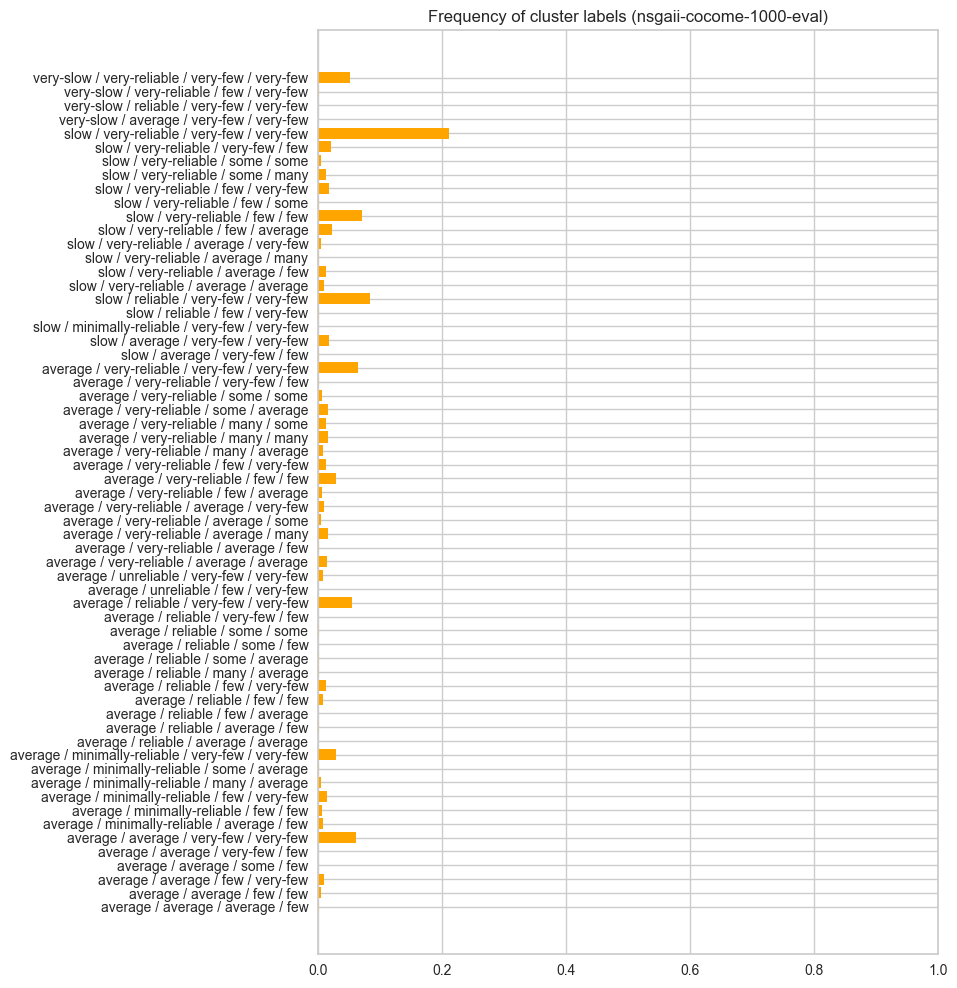

{'average / average / average / few': 0.0020325203252032522,
 'average / average / few / few': 0.0040650406504065045,
 'average / average / few / very-few': 0.01016260162601626,
 'average / average / some / few': 0.0,
 'average / average / very-few / few': 0.0,
 'average / average / very-few / very-few': 0.06097560975609756,
 'average / minimally-reliable / average / few': 0.008130081300813009,
 'average / minimally-reliable / few / few': 0.006097560975609756,
 'average / minimally-reliable / few / very-few': 0.014227642276422764,
 'average / minimally-reliable / many / average': 0.0040650406504065045,
 'average / minimally-reliable / some / average': 0.0020325203252032522,
 'average / minimally-reliable / very-few / very-few': 0.028455284552845527,
 'average / reliable / average / average': 0.0,
 'average / reliable / average / few': 0.0020325203252032522,
 'average / reliable / few / average': 0.0,
 'average / reliable / few / few': 0.008130081300813009,
 'average / reliable / few / 

In [28]:
ref1000_space.show_cluster_labels_distribution(size=(8,12))

### *Visualizations (density)*

PCA components: 2 [0.49688441 0.39408714]


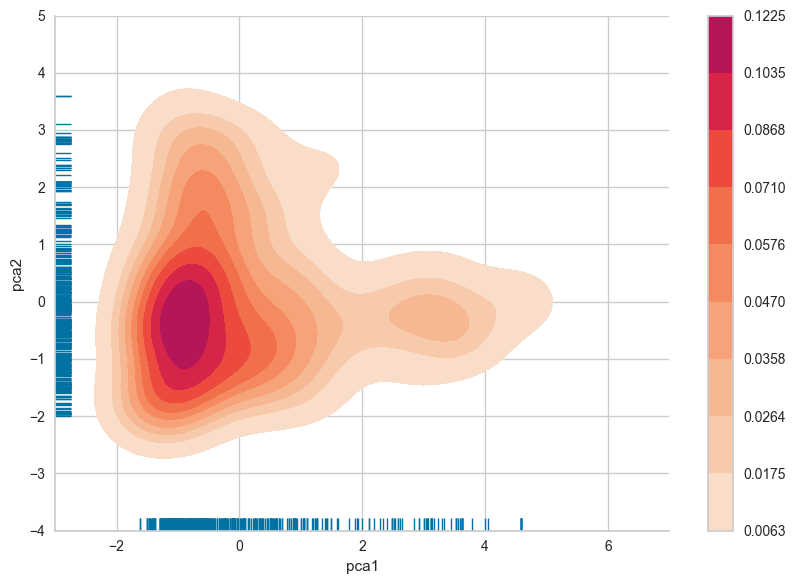

In [29]:
# Density plots for the 2D space of changes versus pas
pca_ref1000 = ref1000_space.show_density_plot(normalize=False, bins=10, pca=True, title='', xlim=(-3,7), ylim=(-4,5), vminmax=(0.005, 0.2)) 
#ref1000_space.show_density_plot(kind='bins', normalize=True, bins=10, pca=True)

In [30]:
# Entropy of 4D space
de_4D = ref1000_space.compute_density_entropy(normalize=True, bins=5)
print("The density entropy is:", de_4D)

The density entropy is: 0.508648663133605


Reusing PCA
4 features ['perfQ', 'reliability', '#changes', 'pas']
51 clusters


/Users/adiazpace/Documents/my-research/optimization/interactive-kit/architecturespaceanalyzer.py:688: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



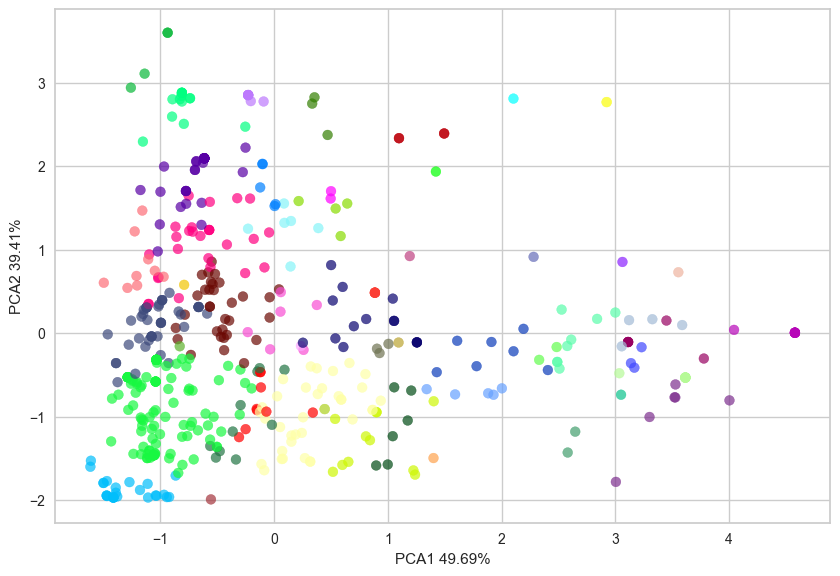

PCA(n_components=2)

In [31]:
show_tradeoffs_pca(ref1000_space, pca=pca_ref1000, title='')

4 features ['perfQ', 'reliability', '#changes', 'pas']
51 clusters


/var/folders/tx/dmzj44qn2s92dyzxj_nrc82c0000gn/T/ipykernel_24740/1473605981.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



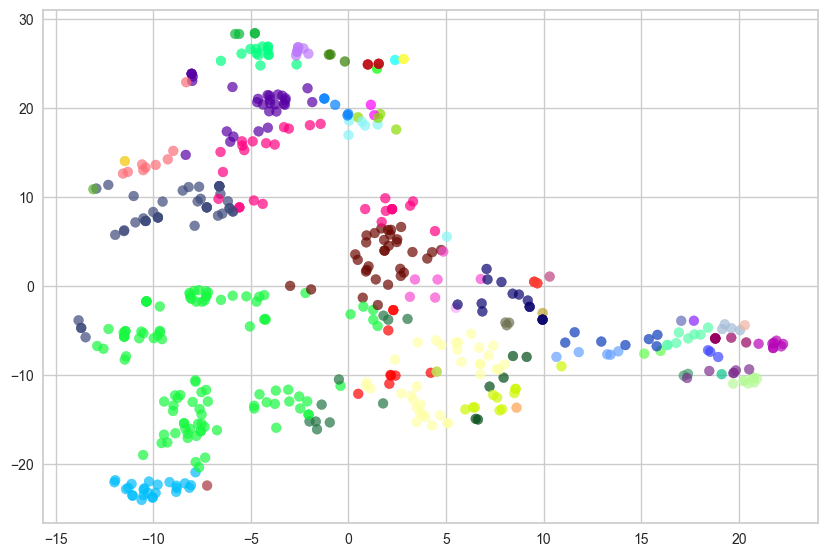

In [32]:
tsne_ref1000 = show_tradeoffs_tsne(ref1000_space, title='')

---
## **Iteration 0 (interactive, 50)**

In [33]:
# Initialize the project/file
it0_50_space = ArchitectureSpaceAnalyzer()
it0_50_space.initialize_dataset(NSGAII_IT0_50_PROJECT_NAME)
print(it0_50_space.PROJECT_NAME)

it0_50_space.set_labels(ALL_CLUSTER_LABELS)
it0_50_space.PERFORMANCE_LIMITS = PERFORMANCE_LIMITS
it0_50_space.RELIABILITY_LIMITS = RELIABILITY_LIMITS
it0_50_space.CHANGES_LIMITS = CHANGES_LIMITS
it0_50_space.PAS_LIMITS = PAS_LIMITS

# Read all the objectives and refactoring actions
# Note that length of sequences is 2
_ = it0_50_space.read_file_batch(1,31, length=2, arguments=0, option='all')

project: nsgaii-cocome-sbspe-50-eval-it-0-l-2
objective files= 31
refactoring actions files= 31
nsgaii-cocome-sbspe-50-eval-it-0-l-2
Reading files ... 1 31 all
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.


In [34]:
it0_50_space.objectives_df.head()

solID     perfQ  reliability  #changes   pas
0      2  0.144165     0.762310      1.45  11.0
1    965  0.368136    -0.405718      3.44  12.0
2   1055  0.368136    -0.405718      3.44  12.0
3   1221  0.077317     0.854894      3.09  10.0
4   1251  0.077317     0.854894      3.09  10.0

Statistics for all the objectives.

In [35]:
it0_50_space.objectives_df.describe()

solID       perfQ  reliability    #changes         pas
count   496.000000  496.000000   496.000000  496.000000  496.000000
mean   1036.951613    0.173249     0.626751    4.806996    8.913306
std     396.747740    0.124340     0.303925    2.629103    4.115325
min       2.000000   -0.114067    -0.468618    1.450000    0.000000
25%     791.500000    0.088208     0.390952    3.090000    6.000000
50%    1198.000000    0.155468     0.764344    3.280000    8.000000
75%    1345.500000    0.295734     0.846584    5.280000   11.000000
max    1446.000000    0.369494     0.973176   15.720000   26.000000

In [36]:
#it0_50_space.refactions_df.head()

### *Metrics* - Not need to analyze them in this dataset

In [37]:
ref50_it0_pf = it0_50_space.get_pareto_front()
#ref50_it0_norm_pf = it0_50_space.compute_pareto_front(invert_max=True)

# The reference front is the ref1000 space
metrics50_it0_dict = it0_50_space.compute_all_metrics(ref_point=(1,1,1,1), reference_front=ref1000_norm_pf)
metrics50_it0_dict['point'] = 'it-0'
print("Pareto front metrics for the 4 objectives:")
print(metrics50_it0_dict)

ref50_it0_pf.head()

Pareto front metrics for the 4 objectives:
{'C_AB': 0.23295454545454544, 'C_BA': 0.021505376344086023, 'IGDPlus': 0.43664395968909175, 'HV': 0.7721225853422875, 'NPS': 194, 'NSolutions': 322, 'NSequences': 475, 'DE': 0.38369525010578365, 'point': 'it-0'}


perfQ  reliability  #changes  pas
0 -0.014279     0.760650      3.09  2.0
1 -0.085576     0.722516      3.44  2.0
2  0.071429     0.871390      3.28  3.0
3  0.071429     0.764059      3.28  3.0
4  0.071429     0.758125      3.28  3.0

### *Clustering*

In [38]:
# Try k-Means
#labels, _, silhouette = it1_50_c258_space.run_kmeans(k=5, show_silhouette=False) 

# Try agglomerative clustering
labels, _, silhouette = it0_50_space.run_agglomerative(k=3, threshold=None, show_dendogram=False) 
it0_50_space.assign_cluster_labels(labels) # This effectively assigns the labels

Number of clusters = 3
Labels for instances: [0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 2 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 2 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 2 0 2 0 0 1 0 0 0
 0 0 1 0 2 1 0 0 2 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 2 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 2 0 1
 0 0 1 1 2 2 2 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 2 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 2 0 0 0 1 1 0 0 0 1 0 1
 0 2 2 1 0 1 0 2 2 2 1 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 2 1 2 0 2 1 0 1 0 0 0 0 0 1 0
 0 1 1 2 2 0 0 0 0 1 0 0 0 0 0 0 2 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1
 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 2 1 1 0 0 0 0 1
 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 2 0 

perfQ  reliability  #changes   pas  cluster  \
178  0.040089     0.853213      3.28   9.0        0   
94   0.119095     0.269325      7.20   6.0        1   
374  0.205965     0.871900      8.52  21.0        2   

                                          label  
178  slow / very-reliable / very-few / very-few  
94        slow / reliable / very-few / very-few  
374       slow / very-reliable / very-few / few

In [39]:
#it0_50_space.show_petal_plot(labels=True, size=(20,5))

This is the **first centroid (317)** chosen as a decision point for the next rounds of search.

In [40]:
centroid_series = it0_50_space.tagged_objectives_df.loc[317]
print(centroid_series)
centroid_rows = it0_50_space.tagged_objectives_df[it0_50_space.tagged_objectives_df['solID']==1419]
centroid_rows

perfQ                                            0.216461
reliability                                      0.759612
#changes                                             3.28
pas                                                  10.0
cluster                                                 0
label          slow / very-reliable / very-few / very-few
solID                                                1419
Name: 317, dtype: object


perfQ  reliability  #changes   pas  cluster  \
239  0.357302     0.763772      4.73   7.0        0   
317  0.216461     0.759612      3.28  10.0        0   
346  0.314372     0.763086      9.02   4.0        1   
471  0.017614     0.945651      3.28  11.0        0   

                                             label  solID  
239  average / very-reliable / very-few / very-few   1419  
317     slow / very-reliable / very-few / very-few   1419  
346  average / very-reliable / very-few / very-few   1419  
471     slow / very-reliable / very-few / very-few   1419

This is the **second centroid (358)** chosen as a decision point for the next rounds of search.

In [41]:
centroid_series = it0_50_space.tagged_objectives_df.loc[358]
print(centroid_series)
centroid_rows = it0_50_space.tagged_objectives_df[it0_50_space.tagged_objectives_df['solID']==838]
centroid_rows

perfQ                                           -0.014243
reliability                                      0.853851
#changes                                             3.28
pas                                                   8.0
cluster                                                 0
label          slow / very-reliable / very-few / very-few
solID                                                 838
Name: 358, dtype: object


perfQ  reliability  #changes  pas  cluster  \
358 -0.014243     0.853851      3.28  8.0        0   

                                          label  solID  
358  slow / very-reliable / very-few / very-few    838

In [42]:
it0_50_space.show_objective_space()

Configuring (real) cluster centroids as prototypes ... [418, 146, 419]


alt.HConcatChart(...)

In [43]:
it0_50_space.clusters_info()

  cluster 0 : 342 items 68.95 % slow / very-reliable / very-few / very-few
  cluster 1 : 126 items 25.40 % slow / reliable / very-few / very-few
  cluster 2 : 28 items 5.65 % slow / very-reliable / very-few / few


In [44]:
it0_50_space.describe_cluster_labels()

Using predefined limits (-0.2, 1)
Using predefined limits (1, 84)
Using predefined limits (0, 86)
Using predefined limits (-1, 1)


objective    min    max  unit               label
0         perfQ  -0.30  -0.02  unit           very-slow
1         perfQ  -0.02   0.26  unit                slow
2         perfQ   0.26   0.54  unit             average
3         perfQ   0.54   0.82  unit                fast
4         perfQ   0.82   1.10  unit           very-fast
5      #changes   0.90  17.54  unit            very-few
6      #changes  17.54  34.18  unit                 few
7      #changes  34.18  50.82  unit             average
8      #changes  50.82  67.46  unit                some
9      #changes  67.46  84.10  unit                many
10          pas  -0.10  17.14  unit            very-few
11          pas  17.14  34.38  unit                 few
12          pas  34.38  51.62  unit             average
13          pas  51.62  68.86  unit                some
14          pas  68.86  86.10  unit                many
15  reliability  -1.10  -0.66  unit          unreliable
16  reliability  -0.66  -0.22  unit  minimally-reliable
17  reliability  -0.22   0.22  unit             average
18  reliability   0.22   0.66  unit            reliable
19  reliability   0.66   1.10  unit       very-reliable

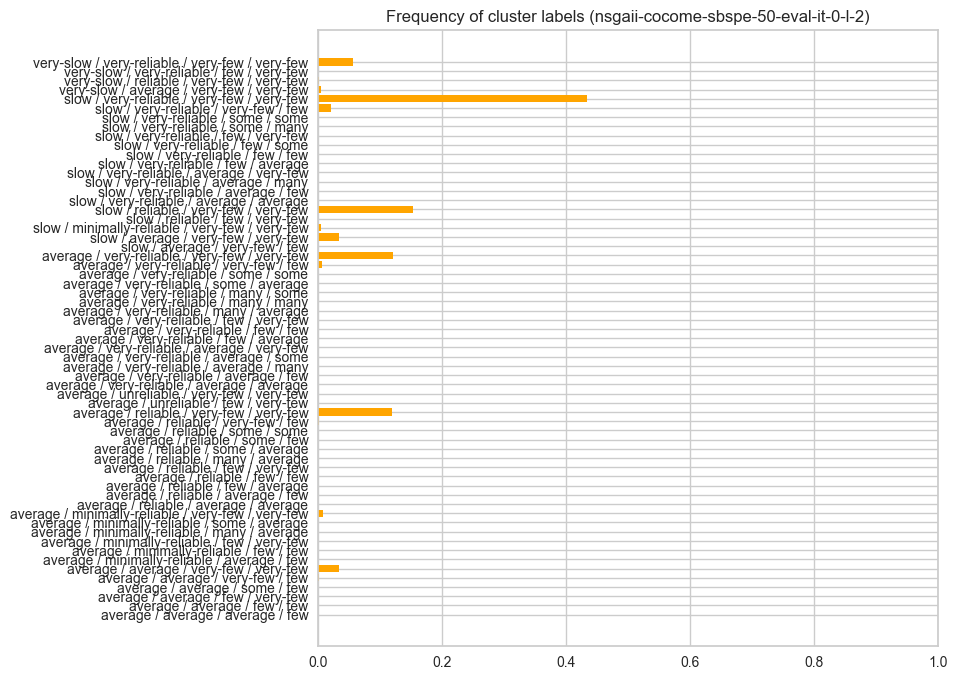

{'average / average / average / few': 0.0,
 'average / average / few / few': 0.0,
 'average / average / few / very-few': 0.0,
 'average / average / some / few': 0.0,
 'average / average / very-few / few': 0.0020161290322580645,
 'average / average / very-few / very-few': 0.034274193548387094,
 'average / minimally-reliable / average / few': 0.0,
 'average / minimally-reliable / few / few': 0.0,
 'average / minimally-reliable / few / very-few': 0.0,
 'average / minimally-reliable / many / average': 0.0,
 'average / minimally-reliable / some / average': 0.0,
 'average / minimally-reliable / very-few / very-few': 0.008064516129032258,
 'average / reliable / average / average': 0.0,
 'average / reliable / average / few': 0.0,
 'average / reliable / few / average': 0.0,
 'average / reliable / few / few': 0.0,
 'average / reliable / few / very-few': 0.0,
 'average / reliable / many / average': 0.0,
 'average / reliable / some / average': 0.0,
 'average / reliable / some / few': 0.0,
 'averag

In [45]:
it0_50_space.show_cluster_labels_distribution(size=(8,8))

### *Visualizations (density)*

Reusing PCA transformation ...
PCA components: 2 [0.49688441 0.39408714]


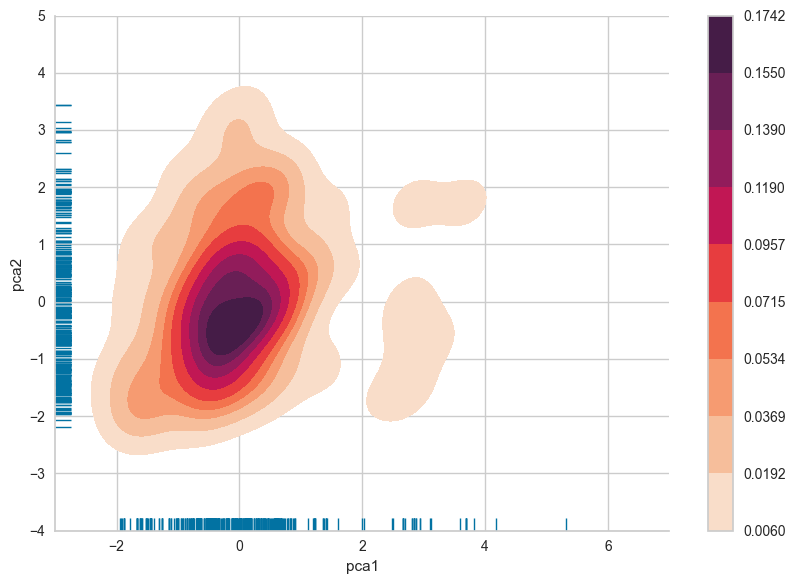

In [46]:
# Density plots for the 2D space of changes versus pas
it0_50_space.show_density_plot(normalize=False, bins=10, pca=pca_ref1000, title='', xlim=(-3,7), ylim=(-4,5), vminmax=(0.005, 0.2)) 
#it0_50_space.show_density_plot(kind='bins', normalize=True, bins=10, pca=True)

In [47]:
# Entropy of 4D space
de_4D = it0_50_space.compute_density_entropy(normalize=True, bins=5)
print("The density entropy is:", de_4D)

The density entropy is: 0.287237756189386


Reusing PCA
4 features ['perfQ', 'reliability', '#changes', 'pas']
15 clusters


/Users/adiazpace/Documents/my-research/optimization/interactive-kit/architecturespaceanalyzer.py:688: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



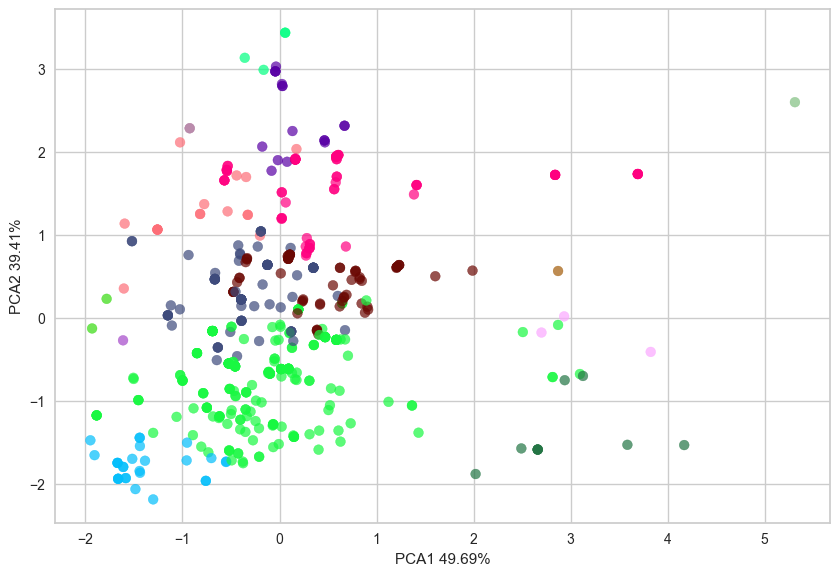

PCA(n_components=2)

In [48]:
show_tradeoffs_pca(it0_50_space, pca=pca_ref1000, title='')

Reusing t-SNE
4 features ['perfQ', 'reliability', '#changes', 'pas']
15 clusters


/var/folders/tx/dmzj44qn2s92dyzxj_nrc82c0000gn/T/ipykernel_24740/1473605981.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



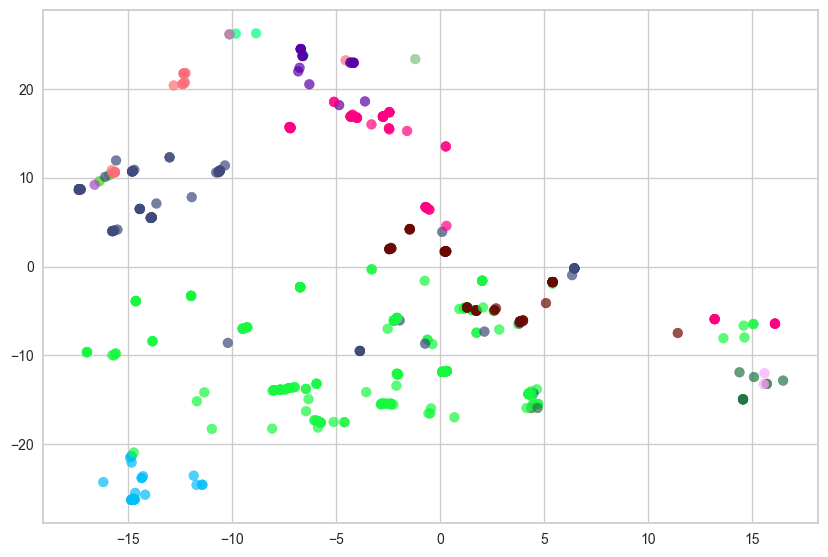

In [49]:
_ = show_tradeoffs_tsne(it0_50_space, title='', tsne=tsne_ref1000)

---
## **Iteration 1: Centroid 317 (interactive, 50)**
This centroid choice is about *slow* perfQ [0.22] and *very-reliable* reliability [0.76]. It has also *very-few* changes and *very-few* pas.

In [50]:
# Initialize the project/file
it1_50_c317_space = ArchitectureSpaceAnalyzer()
it1_50_c317_space.initialize_dataset(NSGAII_IT1_50_C317_PROJECT_NAME)
print(it1_50_c317_space.PROJECT_NAME)

it1_50_c317_space.set_labels(ALL_CLUSTER_LABELS)
it1_50_c317_space.PERFORMANCE_LIMITS = PERFORMANCE_LIMITS
it1_50_c317_space.RELIABILITY_LIMITS = RELIABILITY_LIMITS
it1_50_c317_space.CHANGES_LIMITS = CHANGES_LIMITS
it1_50_c317_space.PAS_LIMITS = PAS_LIMITS

# Read all the objectives and refactoring actions
# Note that length of sequences is 2
_ = it1_50_c317_space.read_file_batch(1,31, length=2, arguments=0, option='all')

project: nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-317
objective files= 31
refactoring actions files= 31
nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-317
Reading files ... 1 31 all
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.


In [51]:
it1_50_c317_space.objectives_df.head()

solID     perfQ  reliability  #changes   pas
0    148  0.142708     0.710623      8.52   0.0
1    342  0.355600     0.818500      6.37  11.0
2    354  0.287485     0.829884      6.37  12.0
3    733  0.119599     0.891019      6.18  12.0
4   1077  0.316861     0.265851      8.52   7.0

Statistics for perfQ and reliability objectives.

In [52]:
it1_50_c317_space.objectives_df.describe()

solID       perfQ  reliability    #changes         pas
count   495.000000  495.000000   495.000000  495.000000  495.000000
mean   1066.761616    0.227654     0.726798    7.319778    6.389899
std     377.502060    0.093745     0.210668    2.664027    4.433437
min      11.000000   -0.115184    -0.447985    3.280000    0.000000
25%     872.000000    0.202272     0.609155    6.180000    2.500000
50%    1232.000000    0.266608     0.819152    6.370000    6.000000
75%    1363.500000    0.291195     0.853642    8.330000   10.000000
max    1457.000000    0.355600     0.972544   27.520000   23.000000

In [53]:
#it1_50_c317_space.refactions_df.head()

### *Metrics*

In [54]:
ref50_it1_c317_pf = it1_50_c317_space.get_pareto_front()
#ref50_it1_c317_norm_pf = it1_50_c317_space.compute_pareto_front(invert_max=True)

# The reference front is the ref1000 space
metrics50_it1_c317_dict = it1_50_c317_space.compute_all_metrics(ref_point=(1,1,1,1), reference_front=ref1000_norm_pf)
metrics50_it1_c317_dict['point'] = 'it1-c317'
print("Pareto front metrics for the 4 objectives:")
print(metrics50_it1_c317_dict)

ref50_it1_c317_pf.head()

Pareto front metrics for the 4 objectives:
{'C_AB': 0.4602272727272727, 'C_BA': 0.009345794392523364, 'IGDPlus': 0.46829982761463057, 'HV': 0.8485725037796362, 'NPS': 108, 'NSolutions': 201, 'NSequences': 461, 'DE': 0.3344030970767684, 'point': 'it1-c317'}


perfQ  reliability  #changes  pas
0  0.142857     0.844967      4.92  0.0
1  0.142857     0.631228      4.92  0.0
2  0.142857     0.904507      6.37  0.0
3  0.142857     0.903496      6.37  0.0
4  0.142857     0.864834      6.37  0.0

In [55]:
complete_pf_it1_50_c317_ = ref50_it1_c317_pf.merge(it1_50_c317_space.objectives_df, on=it1_50_c317_space.ALL_OBJECTIVES)
complete_pf_it1_50_c317_ = complete_pf_it1_50_c317_.drop_duplicates(subset=it1_50_c317_space.ALL_OBJECTIVES)
print(complete_pf_it1_50_c317_.shape)
#complete_pf.to_csv('it1_50_c317_pf.csv', index=False)
complete_pf_it1_50_c317_.head()

(108, 5)


perfQ  reliability  #changes  pas  solID
0   0.142857     0.844967      4.92  0.0   1286
7   0.142857     0.631228      4.92  0.0    909
11  0.142857     0.904507      6.37  0.0   1411
14  0.142857     0.903496      6.37  0.0   1369
15  0.142857     0.864834      6.37  0.0   1412

### *Clustering*

In [56]:
# Try k-Means
#labels, _, silhouette = it1_50_c258_space.run_kmeans(k=5, show_silhouette=False) 

# Try agglomerative clustering
labels, _, silhouette = it1_50_c317_space.run_agglomerative(k=3, threshold=None, show_dendogram=False) 
it1_50_c317_space.assign_cluster_labels(labels) # This effectively assigns the labels

Number of clusters = 3
Labels for instances: [0 0 0 0 1 1 2 2 1 2 0 0 1 0 0 1 0 1 1 0 1 2 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1
 1 2 0 1 2 0 1 0 1 2 0 0 1 1 0 2 1 0 2 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 1 2 1 0 0 0 0 1 0 0 0 0 0 0 2 0 0 1 1 2 0 0 0 2 0 0 2 1 0 1 2 2
 1 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 1 0 0 0 0 2 2 0
 1 0 2 0 0 1 1 0 0 1 0 2 0 0 2 1 2 2 0 1 0 0 2 0 0 0 0 0 2 1 0 1 0 1 2 0 1
 0 0 0 0 0 2 0 2 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 2 1 0 1 0 1 1 1 2 1 0 0 1
 0 1 2 0 0 2 0 0 2 0 1 1 0 0 1 1 0 0 0 2 0 2 0 0 2 0 0 0 1 0 0 0 1 1 0 1 0
 0 2 0 0 0 1 0 0 0 1 1 0 0 0 0 1 2 0 1 1 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 0 2 1 1 0 2 0 1 1 0 0 0 1 0 0 0 1 1 2 1 0 0 0 1 1 2 0 0
 1 0 0 0 0 1 0 1 0 2 1 0 0 0 1 0 0 1 1 0 2 2 0 2 1 0 1 1 0 1 2 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0
 2 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 2 0 1 0 1 1 0 1 0
 1 0 0 0 0 1 1 2 0 2 0 2 1 0 0 0 0 1 0 1 0 1 0 1 0 1 0 

perfQ  reliability  #changes   pas  cluster  \
188  0.217022     0.845430      6.18   8.0        0   
37   0.291195     0.265851      6.88   3.0        1   
21   0.287322     0.831217     12.36  12.0        2   

                                             label  
188     slow / very-reliable / very-few / very-few  
37        average / reliable / very-few / very-few  
21   average / very-reliable / very-few / very-few

In [57]:
it1_50_c317_space.show_objective_space()
#it1_50_c317_space.show_petal_plot(labels=True, size=(20,5))

Configuring (real) cluster centroids as prototypes ... [248, 357, 209]


alt.HConcatChart(...)

In [58]:
it1_50_c317_space.clusters_info()

  cluster 0 : 266 items 53.74 % slow / very-reliable / very-few / very-few
  cluster 1 : 175 items 35.35 % average / reliable / very-few / very-few
  cluster 2 : 54 items 10.91 % average / very-reliable / very-few / very-few


In [59]:
it1_50_c317_space.describe_cluster_labels()

Using predefined limits (-0.2, 1)
Using predefined limits (1, 84)
Using predefined limits (0, 86)
Using predefined limits (-1, 1)


objective    min    max  unit               label
0         perfQ  -0.30  -0.02  unit           very-slow
1         perfQ  -0.02   0.26  unit                slow
2         perfQ   0.26   0.54  unit             average
3         perfQ   0.54   0.82  unit                fast
4         perfQ   0.82   1.10  unit           very-fast
5      #changes   0.90  17.54  unit            very-few
6      #changes  17.54  34.18  unit                 few
7      #changes  34.18  50.82  unit             average
8      #changes  50.82  67.46  unit                some
9      #changes  67.46  84.10  unit                many
10          pas  -0.10  17.14  unit            very-few
11          pas  17.14  34.38  unit                 few
12          pas  34.38  51.62  unit             average
13          pas  51.62  68.86  unit                some
14          pas  68.86  86.10  unit                many
15  reliability  -1.10  -0.66  unit          unreliable
16  reliability  -0.66  -0.22  unit  minimally-reliable
17  reliability  -0.22   0.22  unit             average
18  reliability   0.22   0.66  unit            reliable
19  reliability   0.66   1.10  unit       very-reliable

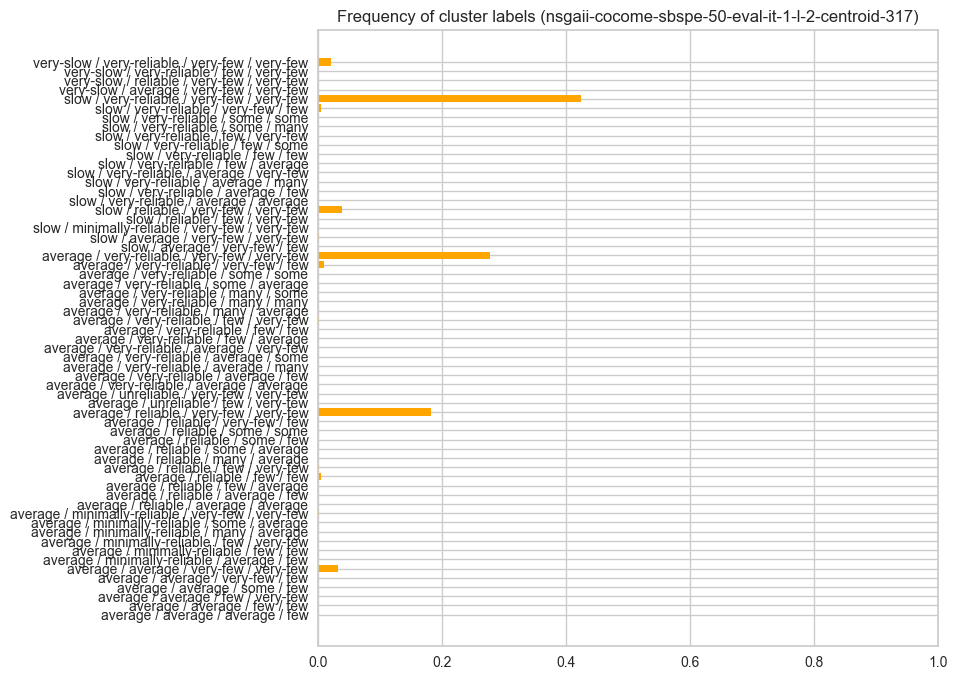

{'average / average / average / few': 0.0,
 'average / average / few / few': 0.0,
 'average / average / few / very-few': 0.0,
 'average / average / some / few': 0.0,
 'average / average / very-few / few': 0.0,
 'average / average / very-few / very-few': 0.03232323232323232,
 'average / minimally-reliable / average / few': 0.0,
 'average / minimally-reliable / few / few': 0.0,
 'average / minimally-reliable / few / very-few': 0.0,
 'average / minimally-reliable / many / average': 0.0,
 'average / minimally-reliable / some / average': 0.0,
 'average / minimally-reliable / very-few / very-few': 0.00202020202020202,
 'average / reliable / average / average': 0.0,
 'average / reliable / average / few': 0.0,
 'average / reliable / few / average': 0.0,
 'average / reliable / few / few': 0.00404040404040404,
 'average / reliable / few / very-few': 0.00202020202020202,
 'average / reliable / many / average': 0.0,
 'average / reliable / some / average': 0.0,
 'average / reliable / some / few': 0

In [60]:
it1_50_c317_space.show_cluster_labels_distribution(size=(8,8))

### *Visualizations (density)*

In [61]:
# Entropy of 4D space
de_4D = it1_50_c317_space.compute_density_entropy(normalize=True, bins=5)
print("The density entropy is:", de_4D)

The density entropy is: 0.23429177152133665


Reusing PCA transformation ...
PCA components: 2 [0.49688441 0.39408714]


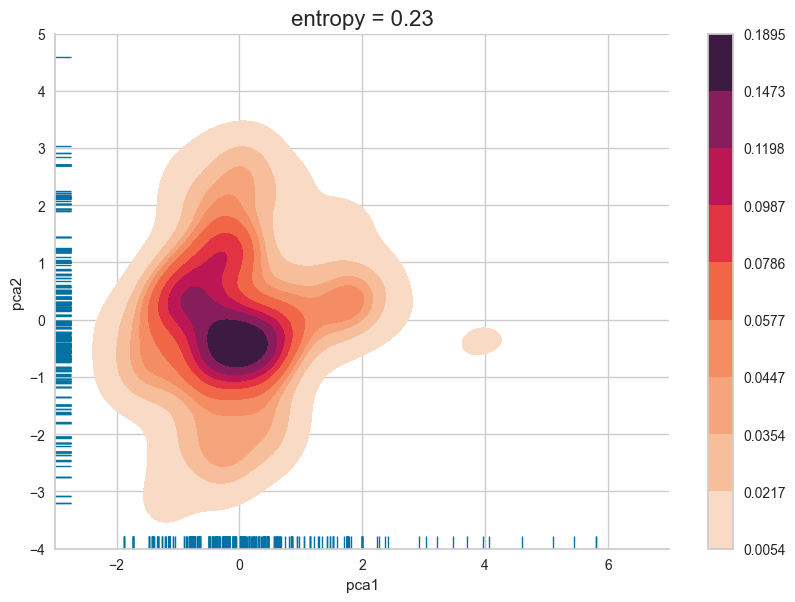

In [62]:
# Density plots for the 2D space of changes versus pas
e_label = f'entropy = {de_4D:.2f}'
it1_50_c317_space.show_density_plot(normalize=False, bins=10, pca=pca_ref1000, title=e_label, xlim=(-3,7), ylim=(-4,5), vminmax=(0.005, 0.2))
#it1_50_c317_space.show_density_plot(kind='bins', normalize=True, bins=10, pca=True)

Reusing PCA
4 features ['perfQ', 'reliability', '#changes', 'pas']
13 clusters


/Users/adiazpace/Documents/my-research/optimization/interactive-kit/architecturespaceanalyzer.py:688: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



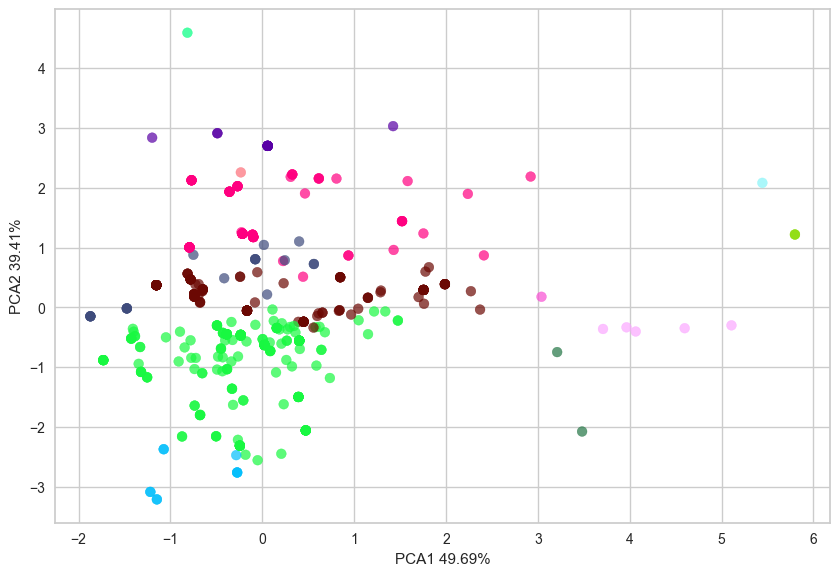

PCA(n_components=2)

In [63]:
show_tradeoffs_pca(it1_50_c317_space, pca=pca_ref1000, title='')

Reusing t-SNE
4 features ['perfQ', 'reliability', '#changes', 'pas']
13 clusters


/var/folders/tx/dmzj44qn2s92dyzxj_nrc82c0000gn/T/ipykernel_24740/1473605981.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



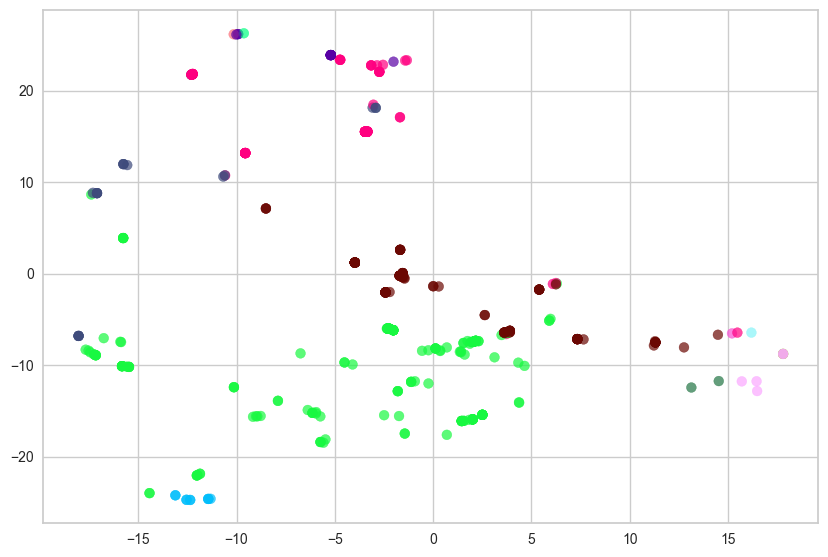

In [64]:
_ = show_tradeoffs_tsne(it1_50_c317_space, title='', tsne=tsne_ref1000)

---
## **Iteration 1: Centroid 358 (interactive, 50)**
This centroid choice is about *slow* perfQ [0.0] (almost *very-slow*) and *very-reliable* reliability [0.85]. It has also *very-few* changes and *very-few* pas.

In [65]:
# Initialize the project/file
it1_50_c358_space = ArchitectureSpaceAnalyzer()
it1_50_c358_space.initialize_dataset(NSGAII_IT1_50_C358_PROJECT_NAME)
print(it1_50_c358_space.PROJECT_NAME)

it1_50_c358_space.set_labels(ALL_CLUSTER_LABELS)
it1_50_c358_space.PERFORMANCE_LIMITS = PERFORMANCE_LIMITS
it1_50_c358_space.RELIABILITY_LIMITS = RELIABILITY_LIMITS
it1_50_c358_space.CHANGES_LIMITS = CHANGES_LIMITS
it1_50_c358_space.PAS_LIMITS = PAS_LIMITS

# Read all the objectives and refactoring actions
# Note that length of sequences is 2
_ = it1_50_c358_space.read_file_batch(1,31, length=2, arguments=0, option='all')

project: nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-358
objective files= 31
refactoring actions files= 31
nsgaii-cocome-sbspe-50-eval-it-1-l-2-centroid-358
Reading files ... 1 31 all
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.


In [66]:
it1_50_c358_space.objectives_df.head()

solID     perfQ  reliability  #changes   pas
0    145 -0.089314     0.979799      6.37   4.0
1    155  0.218910     0.842173      8.01   2.0
2    463  0.129684     0.864324      6.18   2.0
3    509  0.063465     0.852259      4.73  10.0
4    534  0.129684     0.864324     12.36   4.0

Statistics for the 4 objectives.

In [67]:
it1_50_c358_space.objectives_df.describe()

solID       perfQ  reliability    #changes         pas
count   496.000000  496.000000   496.000000  496.000000  496.000000
mean   1092.651210    0.091940     0.834517    6.539254    7.300403
std     366.440169    0.104920     0.176107    2.153158    3.523726
min       3.000000   -0.118269    -0.105238    3.280000    2.000000
25%     913.250000    0.005344     0.852259    4.920000    5.000000
50%    1242.000000    0.074564     0.865916    6.370000    7.000000
75%    1373.000000    0.170891     0.926370    6.560000   10.000000
max    1449.000000    0.290280     0.983003   23.600000   23.000000

In [68]:
#it1_50_c358_space.refactions_df

### *Metrics*

In [69]:
ref50_it1_c358_pf = it1_50_c358_space.get_pareto_front()
#ref50_it1_c358_pf_norm_pf = it1_50_c358_space.compute_pareto_front(invert_max=True)

# The reference front is the ref1000 space
metrics50_it1_c358_dict = it1_50_c358_space.compute_all_metrics(ref_point=(1,1,1,1), reference_front=ref1000_norm_pf)
metrics50_it1_c358_dict['point'] = 'it1-c358'
print("Pareto front metrics for the 4 objectives:")
print(metrics50_it1_c358_dict)

ref50_it1_c358_pf.head()

Pareto front metrics for the 4 objectives:
{'C_AB': 0.26704545454545453, 'C_BA': 0.055900621118012424, 'IGDPlus': 0.3752658596738887, 'HV': 0.8533631136074273, 'NPS': 162, 'NSolutions': 255, 'NSequences': 463, 'DE': 0.28318811575641506, 'point': 'it1-c358'}


perfQ  reliability  #changes  pas
0  0.129684     0.864324      6.18  2.0
1  0.129684     0.864324      6.18  2.0
2  0.138564     0.964771      6.37  2.0
3  0.236410     0.865916      6.37  2.0
4  0.228291     0.865963      6.37  2.0

In [70]:
complete_pf_it1_50_c358 = ref50_it1_c358_pf.merge(it1_50_c358_space.objectives_df, on=it1_50_c358_space.ALL_OBJECTIVES)
complete_pf_it1_50_c358 = complete_pf_it1_50_c358.drop_duplicates(subset=it1_50_c358_space.ALL_OBJECTIVES)
print(complete_pf_it1_50_c358.shape)
#complete_pf.to_csv('it1_50_c317_pf.csv', index=False)
complete_pf_it1_50_c358.head()

(162, 5)


perfQ  reliability  #changes  pas  solID
0   0.129684     0.864324      6.18  2.0    884
13  0.129684     0.864324      6.18  2.0    463
22  0.138564     0.964771      6.37  2.0   1336
25  0.236410     0.865916      6.37  2.0    537
29  0.228291     0.865963      6.37  2.0   1001

### *Clustering*

In [71]:
# Try k-Means
#labels, _, silhouette = it1_50_c358_space.run_kmeans(k=5, show_silhouette=False) 

# Try agglomerative clustering
labels, _, silhouette = it1_50_c358_space.run_agglomerative(k=3, threshold=None, show_dendogram=False) 
it1_50_c358_space.assign_cluster_labels(labels) # This effectively assigns the labels

Number of clusters = 3
Labels for instances: [0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 2 1 1 0 1 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 2 0 1 1 2 0 1 1 0 1 0 0 0 1 0 0 0 2 2 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 2 1 2 0 0 0 1 0 2 0 1 0 0 0 1 1 0 2 2 0 0 0 0 1 0
 1 0 0 0 0 0 2 2 0 1 0 1 0 0 0 0 2 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 2 0 2
 0 0 2 1 1 0 0 0 2 0 0 2 0 0 1 2 2 0 0 0 1 0 2 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 0 2 0 2 1 1 2 0 0 1 0 0 0 1 0 0 0 1 2 0 1 0 0 0 0 1 0 0 2 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 2 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 2 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 2 1 0 0 0 2 0 1 0 2 0 0 0 1 0 1 0 

perfQ  reliability  #changes   pas  cluster  \
425  0.040964     0.872942      6.18   6.0        0   
60   0.170895     0.903032      8.01  11.0        1   
344  0.105986     0.360662      8.33   7.0        2   

                                          label  
425  slow / very-reliable / very-few / very-few  
60   slow / very-reliable / very-few / very-few  
344       slow / reliable / very-few / very-few

In [72]:
it1_50_c358_space.show_objective_space()
#it1_50_c358_space.show_petal_plot(labels=True, size=(20,5))

Configuring (real) cluster centroids as prototypes ... [26, 71, 228]


alt.HConcatChart(...)

In [73]:
it1_50_c358_space.clusters_info()

  cluster 0 : 342 items 68.95 % slow / very-reliable / very-few / very-few
  cluster 1 : 121 items 24.40 % slow / very-reliable / very-few / very-few
  cluster 2 : 33 items 6.65 % slow / reliable / very-few / very-few


In [74]:
it1_50_c358_space.describe_cluster_labels()

Using predefined limits (-0.2, 1)
Using predefined limits (1, 84)
Using predefined limits (0, 86)
Using predefined limits (-1, 1)


objective    min    max  unit               label
0         perfQ  -0.30  -0.02  unit           very-slow
1         perfQ  -0.02   0.26  unit                slow
2         perfQ   0.26   0.54  unit             average
3         perfQ   0.54   0.82  unit                fast
4         perfQ   0.82   1.10  unit           very-fast
5      #changes   0.90  17.54  unit            very-few
6      #changes  17.54  34.18  unit                 few
7      #changes  34.18  50.82  unit             average
8      #changes  50.82  67.46  unit                some
9      #changes  67.46  84.10  unit                many
10          pas  -0.10  17.14  unit            very-few
11          pas  17.14  34.38  unit                 few
12          pas  34.38  51.62  unit             average
13          pas  51.62  68.86  unit                some
14          pas  68.86  86.10  unit                many
15  reliability  -1.10  -0.66  unit          unreliable
16  reliability  -0.66  -0.22  unit  minimally-reliable
17  reliability  -0.22   0.22  unit             average
18  reliability   0.22   0.66  unit            reliable
19  reliability   0.66   1.10  unit       very-reliable

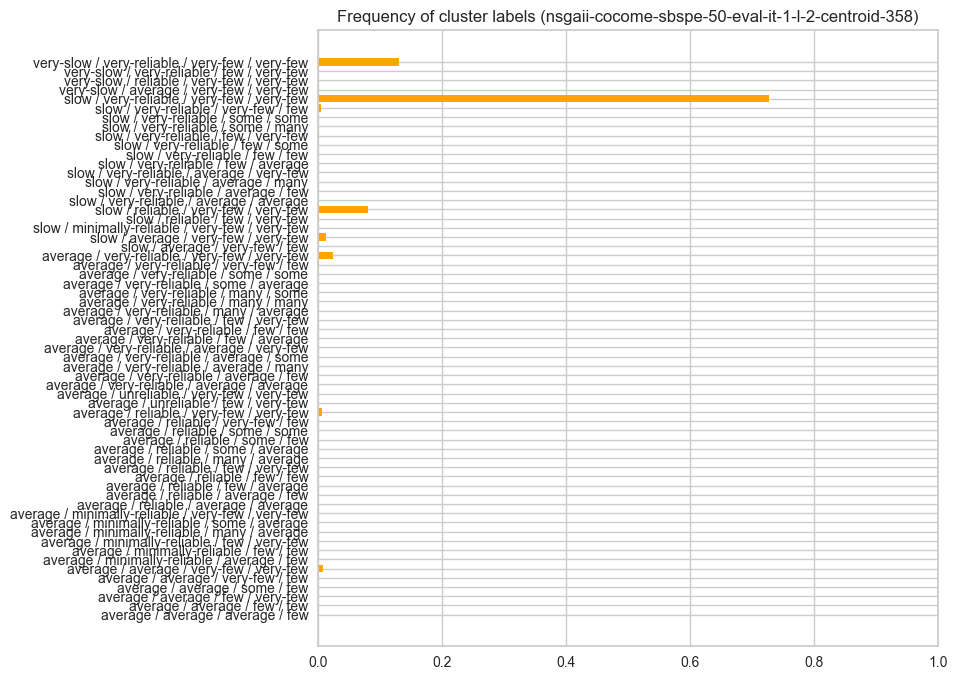

{'average / average / average / few': 0.0,
 'average / average / few / few': 0.0,
 'average / average / few / very-few': 0.0,
 'average / average / some / few': 0.0,
 'average / average / very-few / few': 0.0,
 'average / average / very-few / very-few': 0.008064516129032258,
 'average / minimally-reliable / average / few': 0.0,
 'average / minimally-reliable / few / few': 0.0,
 'average / minimally-reliable / few / very-few': 0.0,
 'average / minimally-reliable / many / average': 0.0,
 'average / minimally-reliable / some / average': 0.0,
 'average / minimally-reliable / very-few / very-few': 0.0,
 'average / reliable / average / average': 0.0,
 'average / reliable / average / few': 0.0,
 'average / reliable / few / average': 0.0,
 'average / reliable / few / few': 0.0,
 'average / reliable / few / very-few': 0.0,
 'average / reliable / many / average': 0.0,
 'average / reliable / some / average': 0.0,
 'average / reliable / some / few': 0.0,
 'average / reliable / some / some': 0.0,
 

In [75]:
it1_50_c358_space.show_cluster_labels_distribution(size=(8,8))

### *Visualizations (density)*

In [76]:
# Entropy of 4D space
de_4D = it1_50_c358_space.compute_density_entropy(normalize=True, bins=5)
print("The density entropy is:", de_4D)

The density entropy is: 0.17619009701024935


Reusing PCA transformation ...
PCA components: 2 [0.49688441 0.39408714]


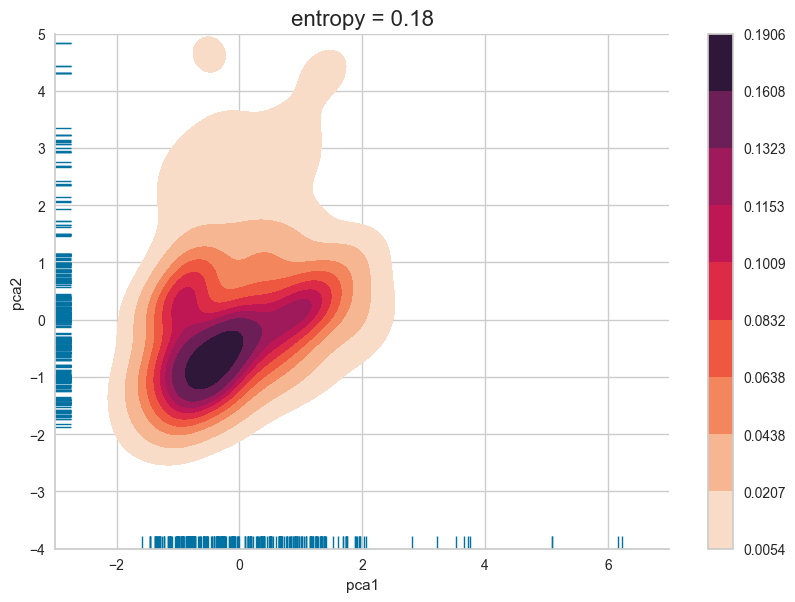

In [77]:
# Density plots for the 2D space of changes versus pas
e_label = f'entropy = {de_4D:.2f}'
it1_50_c358_space.show_density_plot(normalize=False, bins=10, pca=pca_ref1000, title=e_label, xlim=(-3,7), ylim=(-4,5), vminmax=(0.005, 0.2)) 
#it1_50_c358_space.show_density_plot(kind='bins', normalize=True, bins=10, pca=True)

Reusing PCA
4 features ['perfQ', 'reliability', '#changes', 'pas']
11 clusters


/Users/adiazpace/Documents/my-research/optimization/interactive-kit/architecturespaceanalyzer.py:688: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



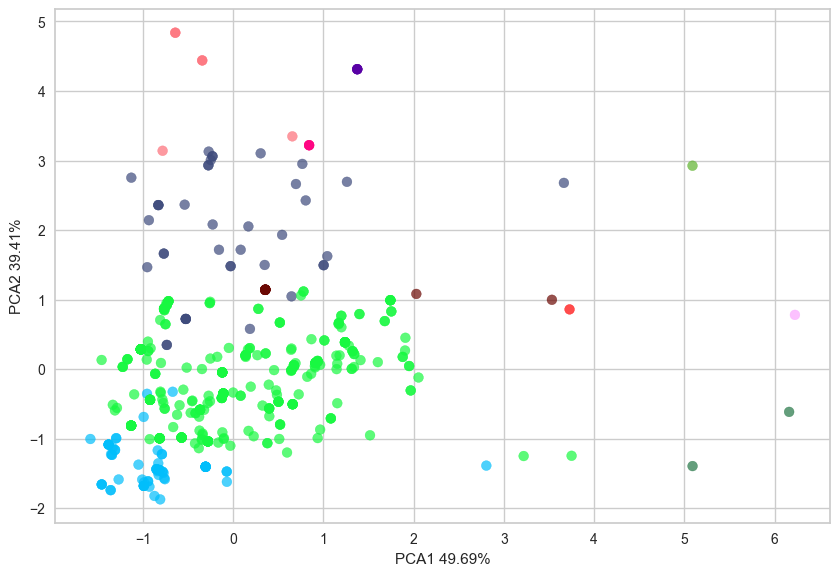

PCA(n_components=2)

In [78]:
show_tradeoffs_pca(it1_50_c358_space, pca=pca_ref1000, title='')

Reusing t-SNE
4 features ['perfQ', 'reliability', '#changes', 'pas']
11 clusters


/var/folders/tx/dmzj44qn2s92dyzxj_nrc82c0000gn/T/ipykernel_24740/1473605981.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



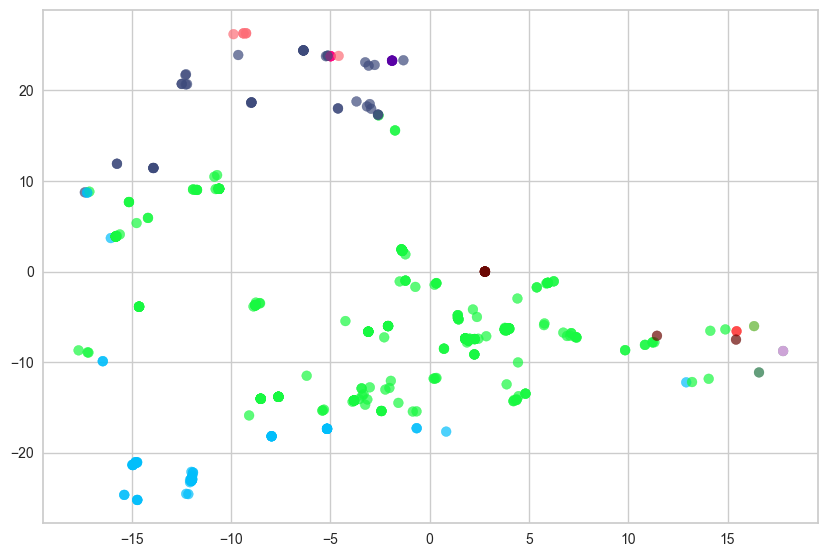

In [79]:
_ = show_tradeoffs_tsne(it1_50_c358_space, title='', tsne=tsne_ref1000)

---
## **Iteration 0 (non-interactive, 100)**

In [80]:
# Initialize the project/file
it0_100_space = ArchitectureSpaceAnalyzer()
it0_100_space.initialize_dataset(NSGAII_IT0_100_PROJECT_NAME)
print(it0_100_space.PROJECT_NAME)

it0_100_space.set_labels(ALL_CLUSTER_LABELS)
it0_100_space.PERFORMANCE_LIMITS = PERFORMANCE_LIMITS
it0_100_space.RELIABILITY_LIMITS = RELIABILITY_LIMITS
it0_100_space.CHANGES_LIMITS = CHANGES_LIMITS
it0_100_space.PAS_LIMITS = PAS_LIMITS

# Read all the objectives and refactoring actions
# Note that length of sequences is 4
_ = it0_100_space.read_file_batch(1,31, length=4, arguments=0, option='all')

project: nsgaii-cocome-sbspe-100-eval-it-0
objective files= 31
refactoring actions files= 31
nsgaii-cocome-sbspe-100-eval-it-0
Reading files ... 1 31 all
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.


In [81]:
it0_100_space.objectives_df.head()

solID     perfQ  reliability  #changes   pas
0    948  0.126520     0.650817      5.99   2.0
1   1030  0.244533     0.682525      4.35   7.0
2   2351  0.082578     0.940504      6.18   2.0
3   2736  0.381278     0.831799     36.86  16.0
4   2749  0.381278     0.831799     36.86  16.0

Statistics for the 4 objectives.

In [82]:
it0_100_space.objectives_df.describe()

solID       perfQ  reliability    #changes         pas
count   491.000000  491.000000   491.000000  491.000000  491.000000
mean   2386.407332    0.256748     0.573065   11.601446    9.788187
std     566.605842    0.146131     0.384496    8.597744    7.253707
min     151.000000   -0.153637    -0.899479    2.900000    0.000000
25%    2223.500000    0.146482     0.325960    5.990000    4.500000
50%    2611.000000    0.283113     0.758567    8.140000    8.000000
75%    2773.000000    0.378676     0.874430   15.145000   12.000000
max    2913.000000    0.442030     0.983421   51.800000   41.000000

In [83]:
#it0_100_space.refactions_df.head()

### *Metrics*

In [84]:
ref100_it0_pf = it0_100_space.get_pareto_front()
#ref100_it0_norm_pf = it0_100_space.compute_pareto_front(invert_max=True, objectives=objs_changes_pas)

# The reference front is the ref1000 space
metrics100_it0_dict = it0_100_space.compute_all_metrics(ref_point=(1,1,1,1), reference_front=ref1000_norm_pf)
metrics100_it0_dict['point'] = 'it-01-baseline'
print("Pareto front metrics for the 4 objectives:")
print(metrics100_it0_dict)

ref100_it0_pf.head()

Pareto front metrics for the 4 objectives:
{'C_AB': 0.5909090909090909, 'C_BA': 0.0, 'IGDPlus': 0.36817237290180743, 'HV': 0.9160491519693155, 'NPS': 175, 'NSolutions': 418, 'NSequences': 489, 'DE': 0.4814687388523536, 'point': 'it-01-baseline'}


perfQ  reliability  #changes  pas
0 -0.014279     0.760650      3.09  2.0
1  0.129657     0.722551      4.35  2.0
2  0.141089     0.865046      4.54  2.0
3  0.155427     0.838017      4.54  2.0
4  0.287124     0.770248      4.73  2.0

### *Clustering*
This is not strictly needed for the RQ, but it is for computing the scatter plot below.

In [85]:
# Try k-Means
#labels, _, silhouette = it0_100_space.run_kmeans(k=5, show_silhouette=False) 

# Try agglomerative clustering
labels, _, silhouette = it0_100_space.run_agglomerative(k=3, threshold=None, show_dendogram=False) 
it0_100_space.assign_cluster_labels(labels) # This effectively assigns the labels

Number of clusters = 3
Labels for instances: [0 0 0 1 1 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 1 2 0 0 0 0 0 0 0 0 0 2 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 2 1 0 1 0 1 0 0 1 0 2 2 2
 0 0 0 2 2 0 1 0 0 1 2 1 2 2 0 0 2 0 0 0 1 1 0 2 0 2 1 2 2 2 2 2 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 2 2
 0 0 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 2 0 0 2 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 1 0 1 2 0 1 0 2 2 2 0 0 1 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 2 2 2 1 1 0 0 0 1 0 0 0 0 0 2 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 1 2 1 1 1 0 1 0 2 2 0 0 0 2 0 2 0 2 0 2 0 0 2
 2 0 0 0 2 2 0 2 0 1 0 0 2 2 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 2 0 0
 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 1 2 0 2 2 0 0 0 0 0 0 2 2 0 2
 2 2 2 2 2 2 0 0 0 0 0 0 1 2 1 0 2 2 2 2 2 0 0 0 0 0 2 0 2 0 2 2 0 0 0 0 0
 2 2 2 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 2 2 2 2 2 1 0 2 0
 0 2 0 2 0 1 0 1 2 0 0 0 0 0 0 0 0 2 1 2 2 2 0 1 1 1 0 

perfQ  reliability  #changes   pas  cluster  \
186  0.359093     0.759891      7.98   7.0        0   
220  0.376742     0.802939     28.96  22.0        1   
325  0.390498     0.500820     15.26  12.0        2   

                                             label  
186  average / very-reliable / very-few / very-few  
220            average / very-reliable / few / few  
325       average / reliable / very-few / very-few

In [86]:
it0_100_space.show_objective_space()
#it0_100_space.show_petal_plot(labels=True, size=(20,5))

Configuring (real) cluster centroids as prototypes ... [174, 239, 366]


alt.HConcatChart(...)

In [87]:
it0_100_space.clusters_info()

  cluster 0 : 322 items 65.58 % average / very-reliable / very-few / very-few
  cluster 2 : 113 items 23.01 % average / reliable / very-few / very-few
  cluster 1 : 56 items 11.41 % average / very-reliable / few / few


In [88]:
it0_100_space.describe_cluster_labels()

Using predefined limits (-0.2, 1)
Using predefined limits (1, 84)
Using predefined limits (0, 86)
Using predefined limits (-1, 1)


objective    min    max  unit               label
0         perfQ  -0.30  -0.02  unit           very-slow
1         perfQ  -0.02   0.26  unit                slow
2         perfQ   0.26   0.54  unit             average
3         perfQ   0.54   0.82  unit                fast
4         perfQ   0.82   1.10  unit           very-fast
5      #changes   0.90  17.54  unit            very-few
6      #changes  17.54  34.18  unit                 few
7      #changes  34.18  50.82  unit             average
8      #changes  50.82  67.46  unit                some
9      #changes  67.46  84.10  unit                many
10          pas  -0.10  17.14  unit            very-few
11          pas  17.14  34.38  unit                 few
12          pas  34.38  51.62  unit             average
13          pas  51.62  68.86  unit                some
14          pas  68.86  86.10  unit                many
15  reliability  -1.10  -0.66  unit          unreliable
16  reliability  -0.66  -0.22  unit  minimally-reliable
17  reliability  -0.22   0.22  unit             average
18  reliability   0.22   0.66  unit            reliable
19  reliability   0.66   1.10  unit       very-reliable

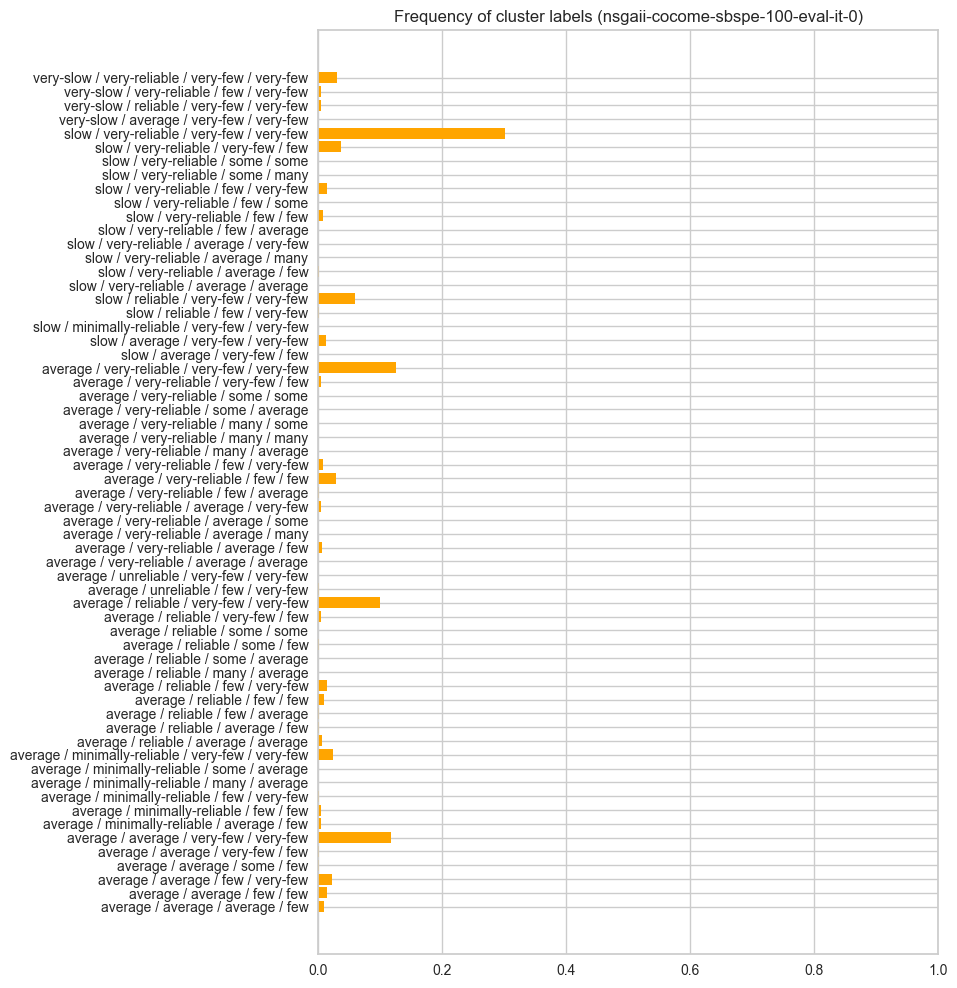

{'average / average / average / few': 0.010183299389002037,
 'average / average / few / few': 0.014256619144602852,
 'average / average / few / very-few': 0.02240325865580448,
 'average / average / some / few': 0.002036659877800407,
 'average / average / very-few / few': 0.002036659877800407,
 'average / average / very-few / very-few': 0.11812627291242363,
 'average / minimally-reliable / average / few': 0.004073319755600814,
 'average / minimally-reliable / few / few': 0.004073319755600814,
 'average / minimally-reliable / few / very-few': 0.002036659877800407,
 'average / minimally-reliable / many / average': 0.0,
 'average / minimally-reliable / some / average': 0.0,
 'average / minimally-reliable / very-few / very-few': 0.024439918533604887,
 'average / reliable / average / average': 0.006109979633401222,
 'average / reliable / average / few': 0.002036659877800407,
 'average / reliable / few / average': 0.002036659877800407,
 'average / reliable / few / few': 0.010183299389002037,


In [89]:
it0_100_space.show_cluster_labels_distribution(size=(8,12))

### *Visualizations (density)*

In [90]:
# Entropy of 4D space
de_4D = it0_100_space.compute_density_entropy(normalize=True, bins=5)
print("The density entropy is:", de_4D)

The density entropy is: 0.4070113904137235


Reusing PCA transformation ...
PCA components: 2 [0.49688441 0.39408714]


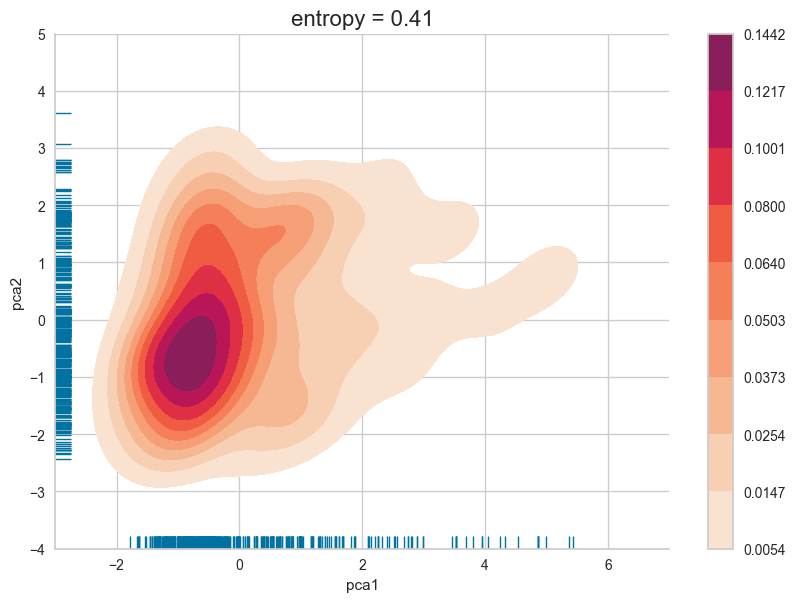

In [91]:
# Density plots for the 2D space of changes versus pas
e_label = f'entropy = {de_4D:.2f}'
it0_100_space.show_density_plot(normalize=False, bins=10, pca=pca_ref1000, title=e_label, xlim=(-3,7), ylim=(-4,5), vminmax=(0.005, 0.2)) 
#it0_100_space.show_density_plot(kind='bins', normalize=True, bins=10, pca=True)

Reusing PCA
4 features ['perfQ', 'reliability', '#changes', 'pas']
37 clusters


/Users/adiazpace/Documents/my-research/optimization/interactive-kit/architecturespaceanalyzer.py:688: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



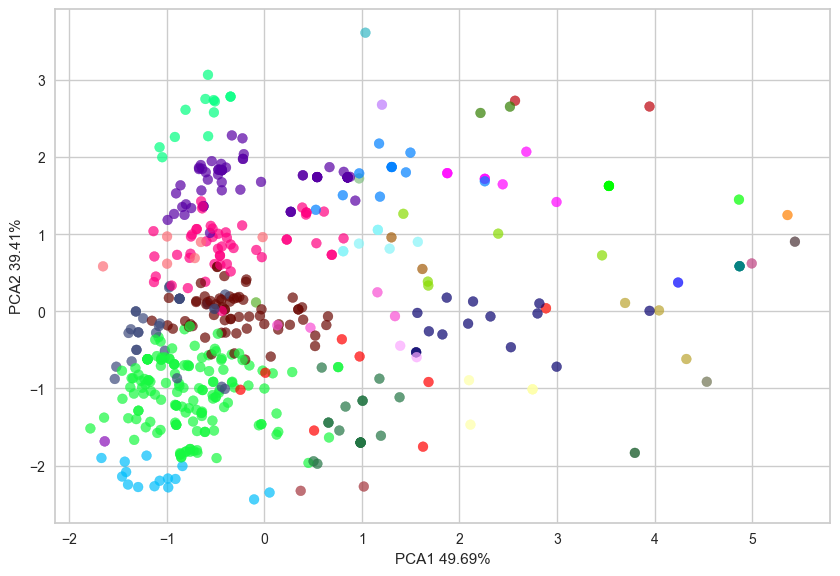

PCA(n_components=2)

In [92]:
show_tradeoffs_pca(it0_100_space, pca=pca_ref1000, title='')

Reusing t-SNE
4 features ['perfQ', 'reliability', '#changes', 'pas']
37 clusters


/var/folders/tx/dmzj44qn2s92dyzxj_nrc82c0000gn/T/ipykernel_24740/1473605981.py:54: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



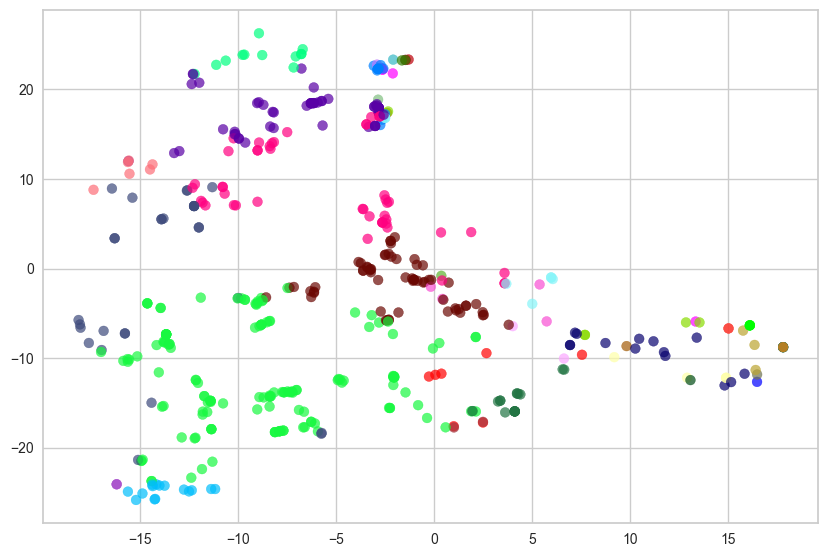

In [93]:
_ = show_tradeoffs_tsne(it0_100_space, title='', tsne=tsne_ref1000)

---

## **Misc**

### *Comparison of Metrics*

In [94]:
# Concatenation of all the metrics
s1 = pd.DataFrame([metrics1000_dict])
#s2 = pd.DataFrame([metrics50_it0_dict])
s3 = pd.DataFrame([metrics50_it1_c317_dict])
s4 = pd.DataFrame([metrics50_it1_c358_dict])
s5 = pd.DataFrame([metrics100_it0_dict])
metrics_df = pd.concat([s1, s3, s4, s5])
metrics_df

C_AB      C_BA   IGDPlus        HV  NPS  NSolutions  NSequences  \
0  0.812500  0.005682  0.320448  0.923617  177         398         492   
0  0.460227  0.009346  0.468300  0.848573  108         201         461   
0  0.267045  0.055901  0.375266  0.853363  162         255         463   
0  0.590909  0.000000  0.368172  0.916049  175         418         489   

         DE           point  
0  0.517058       reference  
0  0.334403        it1-c317  
0  0.283188        it1-c358  
0  0.481469  it-01-baseline

In [95]:
#dfi.export(metrics_df,'table.png', table_conversion = 'matplotlib')
#Image.open('table.png')

In [96]:
# Looking at the different cluster labels from all the spaces
a = set(ref1000_space.CLUSTER_LABELS.values())
b = set(it0_50_space.CLUSTER_LABELS.values())
c = set(it1_50_c317_space.CLUSTER_LABELS.values())
d = set(it1_50_c358_space.CLUSTER_LABELS.values())
e = set(it0_100_space.CLUSTER_LABELS.values())

ALL_CLUSTER_LABELS = a.union(b,c,d,e)
print(len(ALL_CLUSTER_LABELS)) 
ALL_CLUSTER_LABELS = list(ALL_CLUSTER_LABELS)
ALL_CLUSTER_LABELS

8


['slow / very-reliable / some / many',
 'average / very-reliable / very-few / very-few',
 'slow / very-reliable / very-few / very-few',
 'slow / reliable / very-few / very-few',
 'slow / very-reliable / very-few / few',
 'average / reliable / very-few / very-few',
 'average / average / very-few / very-few',
 'average / very-reliable / few / few']

In [97]:
a = set(ref1000_space.tagged_objectives_df['label'])
b = set(it0_50_space.tagged_objectives_df['label'])
c = set(it1_50_c317_space.tagged_objectives_df['label'])
d = set(it1_50_c358_space.tagged_objectives_df['label'])
e = set(it0_100_space.tagged_objectives_df['label'])

ALL_CLUSTER_LABELS = a.union(b,c,d,e)
print(len(ALL_CLUSTER_LABELS)) 
ALL_CLUSTER_LABELS = list(ALL_CLUSTER_LABELS)
ALL_CLUSTER_LABELS

61


['average / average / very-few / few',
 'slow / very-reliable / few / average',
 'slow / reliable / few / very-few',
 'slow / minimally-reliable / very-few / very-few',
 'average / reliable / some / few',
 'average / very-reliable / average / many',
 'average / minimally-reliable / some / average',
 'average / very-reliable / average / average',
 'average / very-reliable / few / very-few',
 'average / average / few / very-few',
 'average / very-reliable / average / some',
 'slow / very-reliable / very-few / very-few',
 'average / reliable / few / very-few',
 'average / reliable / very-few / few',
 'average / minimally-reliable / few / few',
 'average / very-reliable / some / average',
 'slow / very-reliable / some / many',
 'average / average / very-few / very-few',
 'average / very-reliable / average / very-few',
 'slow / very-reliable / average / few',
 'average / reliable / few / few',
 'average / very-reliable / very-few / few',
 'very-slow / very-reliable / very-few / very-few',
 

---

# **REFACTORING ACTIONS**

In [98]:
it0_50_space.ALL_REFACTORINGS

{'Move_Component_New_Node',
 'Move_Operation_Component',
 'Move_Operation_New_Component_New_Node',
 'UMLCloneNode'}

Updating refactoring actions for intermediate-50

In [99]:
refactions_args = {
    'Move_Component_New_Node': 1,
    'Move_Operation_Component': 2,
    'Move_Operation_New_Component_New_Node': 1,
    'UMLCloneNode': 1
}

_, it0_50_updated_refactions_df = it0_50_space.read_file_batch(1,31, length=2, arguments=refactions_args, option='refactions')
print(it0_50_updated_refactions_df.shape)
it0_50_updated_refactions_df.head()

Reading files ... 1 31 refactions
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.
(496, 3)


solID                                                op1  \
0      2                 Move_Component_New_Node(Inventory)   
1    965              Move_Component_New_Node(GUIReporting)   
2   1055  Move_Operation_Component(productBarCodeScanned...   
3   1221  Move_Operation_New_Component_New_Node(enterOrd...   
4   1251  Move_Operation_Component(getTransaction,Invent...   

                                                 op2  
0  Move_Operation_New_Component_New_Node(getProdu...  
1  Move_Operation_Component(productBarCodeScanned...  
2              Move_Component_New_Node(GUIReporting)  
3  Move_Operation_Component(getTransaction,Invent...  
4  Move_Operation_New_Component_New_Node(enterOrd...

In [100]:
# centroid 317 --> solID = 1419
it0_50_space.refactions_df[it0_50_space.refactions_df.solID == 1419]
# Move_Operation_Component	Move_Operation_Component

solID                                                op1  \
239   1419  Move_Operation_Component(printRunningTotal,Cas...   
317   1419  Move_Operation_Component(getEnterpriseByID,GUI...   
346   1419                     UMLCloneNode(EnterpriseServer)   
471   1419  Move_Operation_Component(getEnterpriseByID,App...   

                                                   op2  
239  Move_Operation_New_Component_New_Node(querySto...  
317  Move_Operation_Component(createReport,PrinterC...  
346   Move_Operation_Component(enterOrderID,Inventory)  
471  Move_Operation_Component(rollInReceivedOrder,G...

In [101]:
# centroid 358 --> solID = 584 
it0_50_space.refactions_df[it0_50_space.refactions_df.solID == 838]
# Move_Operation_Component	Move_Operation_Component

solID                                                op1  \
358    838  Move_Operation_Component(getMeanTimeToDelivery...   

                                                  op2  
358  Move_Operation_Component(scanProduct,Enterprise)

Updating refactoring actions for centroid-317

In [102]:
refactions_args = {
    'Move_Component_New_Node': 1,
    'Move_Operation_Component': 2,
    'Move_Operation_New_Component_New_Node': 1,
    'UMLCloneNode': 1
}

_, it1_50_c317_updated_refactions_df = it1_50_c317_space.read_file_batch(1,31, length=2, arguments=refactions_args, option='refactions')
print(it1_50_c317_updated_refactions_df.shape)
it1_50_c317_updated_refactions_df.head()

Reading files ... 1 31 refactions
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.
(495, 3)


solID                                                op1  \
0    148  Move_Operation_Component(rollInReceivedOrder,D...   
1    342   Move_Operation_Component(enterOrderID,Inventory)   
2    354  Move_Operation_Component(getProductWithStockIt...   
3    733  Move_Operation_New_Component_New_Node(enterOrd...   
4   1077                 Move_Component_New_Node(DataStore)   

                                                 op2  
0               Move_Component_New_Node(CashDeskGUI)  
1  Move_Operation_New_Component_New_Node(createRe...  
2  Move_Operation_New_Component_New_Node(enterOrd...  
3  Move_Operation_New_Component_New_Node(createRe...  
4   Move_Operation_Component(enterOrderID,Inventory)

In [103]:
prefix_sequence_centroid317 = ['Move_Operation_Component(getEnterpriseByID,GUIStore)',	'Move_Operation_Component(createReport,PrinterController)']
it1_50_c317_updated_refactions_df = it1_50_c317_space.add_sequence_prefix(prefix_sequence_centroid317)
it1_50_c317_updated_refactions_df

solID                                                op1  \
0      148  Move_Operation_Component(getEnterpriseByID,GUI...   
1      342  Move_Operation_Component(getEnterpriseByID,GUI...   
2      354  Move_Operation_Component(getEnterpriseByID,GUI...   
3      733  Move_Operation_Component(getEnterpriseByID,GUI...   
4     1077  Move_Operation_Component(getEnterpriseByID,GUI...   
..     ...                                                ...   
490   1406  Move_Operation_Component(getEnterpriseByID,GUI...   
491   1402  Move_Operation_Component(getEnterpriseByID,GUI...   
492    379  Move_Operation_Component(getEnterpriseByID,GUI...   
493   1407  Move_Operation_Component(getEnterpriseByID,GUI...   
494   1284  Move_Operation_Component(getEnterpriseByID,GUI...   

                                                   op2  \
0    Move_Operation_Component(createReport,PrinterC...   
1    Move_Operation_Component(createReport,PrinterC...   
2    Move_Operation_Component(createReport,PrinterC...   
3    Move_Operation_Component(createReport,PrinterC...   
4    Move_Operation_Component(createReport,PrinterC...   
..                                                 ...   
490  Move_Operation_Component(createReport,PrinterC...   
491  Move_Operation_Component(createReport,PrinterC...   
492  Move_Operation_Component(createReport,PrinterC...   
493  Move_Operation_Component(createReport,PrinterC...   
494  Move_Operation_Component(createReport,PrinterC...   

                                                   op3  \
0    Move_Operation_Component(rollInReceivedOrder,D...   
1     Move_Operation_Component(enterOrderID,Inventory)   
2    Move_Operation_Component(getProductWithStockIt...   
3    Move_Operation_New_Component_New_Node(enterOrd...   
4                   Move_Component_New_Node(DataStore)   
..                                                 ...   
490                 Move_Component_New_Node(DataStore)   
491  Move_Operation_New_Component_New_Node(getTrans...   
492                 Move_Component_New_Node(DataStore)   
493                 Move_Component_New_Node(DataStore)   
494  Move_Operation_New_Component_New_Node(querySto...   

                                                   op4  
0                 Move_Component_New_Node(CashDeskGUI)  
1    Move_Operation_New_Component_New_Node(createRe...  
2    Move_Operation_New_Component_New_Node(enterOrd...  
3    Move_Operation_New_Component_New_Node(createRe...  
4     Move_Operation_Component(enterOrderID,Inventory)  
..                                                 ...  
490               Move_Component_New_Node(Persistence)  
491  Move_Operation_New_Component_New_Node(getMeanT...  
492  Move_Operation_New_Component_New_Node(getMeanT...  
493  Move_Operation_New_Component_New_Node(querySto...  
494                 Move_Component_New_Node(DataStore)  

[495 rows x 5 columns]

In [104]:
# Merging the 2 files (after removing duplicates)
complete_pf_it1_50_c317_ = complete_pf_it1_50_c317_.drop_duplicates(subset='solID') # Removing duplicate
print(complete_pf_it1_50_c317_.shape)
it1_50_c317_updated_refactions_df = it1_50_c317_updated_refactions_df.drop_duplicates(subset='solID') # Removing duplicates
print(it1_50_c317_updated_refactions_df.shape)

(101, 5)
(349, 5)


In [105]:
merged_df = complete_pf_it1_50_c317_.merge(it1_50_c317_updated_refactions_df, on='solID')
merged_df.to_csv('merged-'+it1_50_c317_space.PROJECT_NAME+'.csv', index=False)
merged_df

perfQ  reliability  #changes   pas  solID  \
0    0.142857     0.844967      4.92   0.0   1286   
1    0.142857     0.631228      4.92   0.0    909   
2    0.142857     0.904507      6.37   0.0   1411   
3    0.142857     0.903496      6.37   0.0   1369   
4    0.142857     0.864834      6.37   0.0   1412   
..        ...          ...       ...   ...    ...   
96   0.350711     0.764328     10.32  11.0     91   
97   0.337857     0.758397     10.32  11.0   1017   
98   0.326618     0.488175     10.13  11.0    356   
99   0.343717     0.824942     10.32  12.0    574   
100  0.316861     0.265851     16.85  10.0    762   

                                                   op1  \
0    Move_Operation_Component(getEnterpriseByID,GUI...   
1    Move_Operation_Component(getEnterpriseByID,GUI...   
2    Move_Operation_Component(getEnterpriseByID,GUI...   
3    Move_Operation_Component(getEnterpriseByID,GUI...   
4    Move_Operation_Component(getEnterpriseByID,GUI...   
..                                                 ...   
96   Move_Operation_Component(getEnterpriseByID,GUI...   
97   Move_Operation_Component(getEnterpriseByID,GUI...   
98   Move_Operation_Component(getEnterpriseByID,GUI...   
99   Move_Operation_Component(getEnterpriseByID,GUI...   
100  Move_Operation_Component(getEnterpriseByID,GUI...   

                                                   op2  \
0    Move_Operation_Component(createReport,PrinterC...   
1    Move_Operation_Component(createReport,PrinterC...   
2    Move_Operation_Component(createReport,PrinterC...   
3    Move_Operation_Component(createReport,PrinterC...   
4    Move_Operation_Component(createReport,PrinterC...   
..                                                 ...   
96   Move_Operation_Component(createReport,PrinterC...   
97   Move_Operation_Component(createReport,PrinterC...   
98   Move_Operation_Component(createReport,PrinterC...   
99   Move_Operation_Component(createReport,PrinterC...   
100  Move_Operation_Component(createReport,PrinterC...   

                                                   op3  \
0                Move_Component_New_Node(GUIReporting)   
1                Move_Component_New_Node(GUIReporting)   
2    Move_Operation_New_Component_New_Node(getMeanT...   
3    Move_Operation_Component(queryStockItem,CashDe...   
4    Move_Operation_New_Component_New_Node(enterOrd...   
..                                                 ...   
96                  Move_Component_New_Node(DataStore)   
97    Move_Operation_Component(enterOrderID,Inventory)   
98   Move_Operation_New_Component_New_Node(getEnter...   
99    Move_Operation_Component(enterOrderID,DataStore)   
100                 Move_Component_New_Node(DataStore)   

                                                   op4  
0    Move_Operation_Component(queryStockItem,CashDe...  
1    Move_Operation_Component(queryStockItem,Scanne...  
2    Move_Operation_Component(queryStockItem,CashDe...  
3    Move_Operation_New_Component_New_Node(getTrans...  
4    Move_Operation_New_Component_New_Node(getMeanT...  
..                                                 ...  
96   Move_Operation_New_Component_New_Node(getTrans...  
97          Move_Component_New_Node(PrinterController)  
98          Move_Component_New_Node(PrinterController)  
99          Move_Component_New_Node(PrinterController)  
100   Move_Operation_Component(enterOrderID,Inventory)  

[101 rows x 9 columns]

Updating refactoring actions for centroid-358

In [106]:
refactions_args = {
    'Move_Component_New_Node': 1,
    'Move_Operation_Component': 2,
    'Move_Operation_New_Component_New_Node': 1,
    'UMLCloneNode': 1
}

_, it1_50_c358_updated_refactions_df = it1_50_c358_space.read_file_batch(1,31, length=2, arguments=refactions_args, option='refactions')
print(it1_50_c358_updated_refactions_df.shape)
it1_50_c358_updated_refactions_df.head()

Reading files ... 1 31 refactions
  file 0
  file 1
  file 2
  file 3
  file 4
  file 5
  file 6
  file 7
  file 8
  file 9
  file 10
  file 11
  file 12
  file 13
  file 14
  file 15
  file 16
  file 17
  file 18
  file 19
  file 20
  file 21
  file 22
  file 23
  file 24
  file 25
  file 26
  file 27
  file 28
  file 29
  file 30
done.
(496, 3)


solID                                                op1  \
0    145  Move_Operation_Component(rollInReceivedOrder,G...   
1    155  Move_Operation_New_Component_New_Node(querySto...   
2    463  Move_Operation_New_Component_New_Node(getProdu...   
3    509                 Move_Component_New_Node(Reporting)   
4    534  Move_Operation_New_Component_New_Node(getProdu...   

                                                 op2  
0  Move_Operation_New_Component_New_Node(getMeanT...  
1  Move_Operation_Component(printRunningTotal,GUI...  
2  Move_Operation_New_Component_New_Node(querySto...  
3  Move_Operation_New_Component_New_Node(getProdu...  
4  Move_Operation_New_Component_New_Node(querySto...

In [107]:
prefix_sequence_centroid358 = ['Move_Operation_Component(getMeanTimeToDeliveryReport,GUIReporting)',	'Move_Operation_Component(scanProduct,Enterprise)']
it1_50_c358_updated_refactions_df = it1_50_c358_space.add_sequence_prefix(prefix_sequence_centroid358)
it1_50_c358_updated_refactions_df

solID                                                op1  \
0      145  Move_Operation_Component(getMeanTimeToDelivery...   
1      155  Move_Operation_Component(getMeanTimeToDelivery...   
2      463  Move_Operation_Component(getMeanTimeToDelivery...   
3      509  Move_Operation_Component(getMeanTimeToDelivery...   
4      534  Move_Operation_Component(getMeanTimeToDelivery...   
..     ...                                                ...   
491    656  Move_Operation_Component(getMeanTimeToDelivery...   
492   1103  Move_Operation_Component(getMeanTimeToDelivery...   
493   1290  Move_Operation_Component(getMeanTimeToDelivery...   
494   1419  Move_Operation_Component(getMeanTimeToDelivery...   
495   1310  Move_Operation_Component(getMeanTimeToDelivery...   

                                                  op2  \
0    Move_Operation_Component(scanProduct,Enterprise)   
1    Move_Operation_Component(scanProduct,Enterprise)   
2    Move_Operation_Component(scanProduct,Enterprise)   
3    Move_Operation_Component(scanProduct,Enterprise)   
4    Move_Operation_Component(scanProduct,Enterprise)   
..                                                ...   
491  Move_Operation_Component(scanProduct,Enterprise)   
492  Move_Operation_Component(scanProduct,Enterprise)   
493  Move_Operation_Component(scanProduct,Enterprise)   
494  Move_Operation_Component(scanProduct,Enterprise)   
495  Move_Operation_Component(scanProduct,Enterprise)   

                                                   op3  \
0    Move_Operation_Component(rollInReceivedOrder,G...   
1    Move_Operation_New_Component_New_Node(querySto...   
2    Move_Operation_New_Component_New_Node(getProdu...   
3                   Move_Component_New_Node(Reporting)   
4    Move_Operation_New_Component_New_Node(getProdu...   
..                                                 ...   
491  Move_Operation_Component(rollInReceivedOrder,I...   
492  Move_Operation_New_Component_New_Node(querySto...   
493  Move_Operation_New_Component_New_Node(getProdu...   
494                 Move_Component_New_Node(Reporting)   
495  Move_Operation_Component(rollInReceivedOrder,G...   

                                                   op4  
0    Move_Operation_New_Component_New_Node(getMeanT...  
1    Move_Operation_Component(printRunningTotal,GUI...  
2    Move_Operation_New_Component_New_Node(querySto...  
3    Move_Operation_New_Component_New_Node(getProdu...  
4    Move_Operation_New_Component_New_Node(querySto...  
..                                                 ...  
491  Move_Operation_New_Component_New_Node(enterOrd...  
492                 Move_Component_New_Node(Reporting)  
493  Move_Operation_New_Component_New_Node(scanProd...  
494  Move_Operation_New_Component_New_Node(enterOrd...  
495  Move_Operation_New_Component_New_Node(scanProd...  

[496 rows x 5 columns]

In [108]:
# Merging the 2 files (after removing duplicates)
complete_pf_it1_50_c358 = complete_pf_it1_50_c358.drop_duplicates(subset='solID') # Removing duplicate
print(complete_pf_it1_50_c358.shape)
it1_50_c358_updated_refactions_df = it1_50_c358_updated_refactions_df.drop_duplicates(subset='solID') # Removing duplicates
print(it1_50_c358_updated_refactions_df.shape)

(141, 5)
(355, 5)


In [110]:
merged_df = complete_pf_it1_50_c358.merge(it1_50_c358_updated_refactions_df, on='solID')
merged_df.to_csv('merged-'+it1_50_c358_space.PROJECT_NAME+'.csv', index=False)
merged_df

perfQ  reliability  #changes   pas  solID  \
0    0.129684     0.864324      6.18   2.0    884   
1    0.129684     0.864324      6.18   2.0    463   
2    0.138564     0.964771      6.37   2.0   1336   
3    0.236410     0.865916      6.37   2.0    537   
4    0.228291     0.865963      6.37   2.0   1001   
..        ...          ...       ...   ...    ...   
136  0.068517     0.974221      6.56  12.0    723   
137  0.290280     0.854307      8.61  12.0   1237   
138  0.174131     0.971695      9.84  11.0   1122   
139  0.288943     0.063292      8.52  12.0   1127   
140  0.285838     0.865935     12.74  13.0   1409   

                                                   op1  \
0    Move_Operation_Component(getMeanTimeToDelivery...   
1    Move_Operation_Component(getMeanTimeToDelivery...   
2    Move_Operation_Component(getMeanTimeToDelivery...   
3    Move_Operation_Component(getMeanTimeToDelivery...   
4    Move_Operation_Component(getMeanTimeToDelivery...   
..                                                 ...   
136  Move_Operation_Component(getMeanTimeToDelivery...   
137  Move_Operation_Component(getMeanTimeToDelivery...   
138  Move_Operation_Component(getMeanTimeToDelivery...   
139  Move_Operation_Component(getMeanTimeToDelivery...   
140  Move_Operation_Component(getMeanTimeToDelivery...   

                                                  op2  \
0    Move_Operation_Component(scanProduct,Enterprise)   
1    Move_Operation_Component(scanProduct,Enterprise)   
2    Move_Operation_Component(scanProduct,Enterprise)   
3    Move_Operation_Component(scanProduct,Enterprise)   
4    Move_Operation_Component(scanProduct,Enterprise)   
..                                                ...   
136  Move_Operation_Component(scanProduct,Enterprise)   
137  Move_Operation_Component(scanProduct,Enterprise)   
138  Move_Operation_Component(scanProduct,Enterprise)   
139  Move_Operation_Component(scanProduct,Enterprise)   
140  Move_Operation_Component(scanProduct,Enterprise)   

                                                   op3  \
0    Move_Operation_New_Component_New_Node(querySto...   
1    Move_Operation_New_Component_New_Node(getProdu...   
2    Move_Operation_New_Component_New_Node(querySto...   
3    Move_Operation_New_Component_New_Node(querySto...   
4    Move_Operation_Component(getProductWithStockIt...   
..                                                 ...   
136   Move_Operation_Component(createReport,Reporting)   
137    Move_Operation_Component(scanProduct,Inventory)   
138  Move_Operation_Component(rollInReceivedOrder,G...   
139              Move_Component_New_Node(GUIReporting)   
140  Move_Operation_New_Component_New_Node(enterOrd...   

                                                   op4  
0    Move_Operation_New_Component_New_Node(getProdu...  
1    Move_Operation_New_Component_New_Node(querySto...  
2    Move_Operation_Component(enterOrderID,CashDesk...  
3     Move_Operation_Component(enterOrderID,Inventory)  
4    Move_Operation_New_Component_New_Node(querySto...  
..                                                 ...  
136  Move_Operation_Component(enterOrderID,CashDesk...  
137                     UMLCloneNode(EnterpriseClient)  
138  Move_Operation_Component(saleStartedEvent,GUIR...  
139    Move_Operation_Component(scanProduct,Inventory)  
140  Move_Operation_Component(saleStartedEvent,GUIR...  

[141 rows x 9 columns]

---